In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
import warnings
# warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


23:54:47 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=172230;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=730845;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


23:54:48 INFO      Starting 3ML!                                                                     ]8;id=189308;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=886150;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=333563;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=421140;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=767051;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=192175;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=113190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=50552;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

23:54:48 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=452100;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=775046;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=401377;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=140760;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=50033;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=284287;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=837074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=76738;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load Mymap:  11%|█         | 4/37 [00:00<00:00, 352.99it/s]     
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


WARNING RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96, got 80


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 232, got 216

ReLoad Mycatalog:  59%|█████▉    | 22/37 [00:00<00:00, 36.59it/s] 
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 36.59it/s]   

Yourlib init successfully!!!


17:54:34 INFO      Region of Interest:                                                                   ]8;id=748118;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=504227;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=517728;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=368376;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (274.466, -15.903), model radius:     ]8;id=584172;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=770359;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.500 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=440648;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=357787;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=642137;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=456506;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=386090;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=672272;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 280 x 280 px                                                           ]8;id=218616;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=718323;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.05 deg                                                                 ]8;id=659426;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=29281;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=264042;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=24402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=767811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=892569;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=399406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=790111;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=996374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=784287;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=317985;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=351321;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=807247;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=987019;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=485784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=851110;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=561935;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=358535;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=170663;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=398075;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme     Obs counts     Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  899087.600703  887010.758362  1.013615          27885  \
1   1   1024   RING  503766.474199  492681.862829  1.022499          27885   
2   2   1024   RING   87507.062503   84032.034638  1.041354          27885   
3   3   1024   RING   33084.489118   31305.470350  1.056828          27885   
4   4   1024   RING    7240.836345    6683.045606  1.083464          27885   
5   5   1024   RING    2301.727917    1901.459867  1.210506          27885   

   Area (deg^2)  
0     91.420716  
1     91.420716  
2     91.420716  
3     91.420716  
4     91.420716  
5     91.420716

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=278918;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=640505;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.68 Mb                                                         ]8;id=981952;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=466663;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=451473;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=750131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=308498;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=359531;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=268598;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=241611;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=705466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=139465;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

17:54:35 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=846464;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=433095;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

17:54:36 INFO      J1809M1918u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=950460;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=515676;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=576646;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=183262;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=3.46e-13 kb=(1.00e-15, 1.26e-12) index=-2.24 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=672648;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=182994;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.35 sb=(0.00,0.83) fitrange=1.60                                                         

         INFO      J1813M1245 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=103801;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=413176;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=828900;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=109561;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.44e-13 kb=(1.00e-15, 9.04e-13) index=-2.61 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=1.68                                                                  ]8;id=799145;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=793745;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#353\353]8;;\

         INFO      J1814M1719u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=908153;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=559222;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=607817;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=692944;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.65e-12 kb=(1.00e-15, 6.34e-12) index=-2.83 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=909823;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=34825;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.71 sb=(0.15,1.27) fitrange=2.16                                                         

         INFO      J1825M1418 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=611595;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=868319;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=908535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=881931;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=3.92e-12 kb=(4.70e-13, 7.37e-12) index=-2.98 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=8977;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=160980;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.81 sb=(0.41,1.21) fitrange=1.52                                                         

         INFO      J1825M1256u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=886929;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=117945;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=896755;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=341964;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.27e-13 kb=(1.70e-14, 1.64e-12) index=-2.61 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=848652;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=210484;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.24 sb=(0.00,0.48) fitrange=0.64                                                         

         INFO      J1825M1337u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=257666;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=494617;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=194691;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=361797;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.04e-12 kb=(2.00e-13, 1.88e-12) index=-2.55 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=416507;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=772203;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.17 sb=(0.01,0.33) fitrange=0.40                                                         

         INFO      J1831M1007u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=217457;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=966548;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

17:54:37 INFO      Spec:                                                                               ]8;id=335906;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=1010;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.78e-12 kb=(1.90e-13, 3.37e-12) index=-2.71 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=391393;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=808350;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.78 sb=(0.46,1.10) fitrange=1.28                                                         

         INFO      Set diffuse range: [6, 22] [-8, 8]                                                 ]8;id=413534;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=504164;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=974007;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=804611;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (277.63954061628795, -27.557682624653204)                                          ]8;id=741626;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=778880;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (285.1111448645484, -13.332266152852325)                                           ]8;id=504216;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=969134;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (270.70021251634495, -5.950912756760416)                                           ]8;id=615912;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=322225;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (262.45685841291584, -19.61632769080187)                                           ]8;id=557645;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=723319;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=474004;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=91953;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.1405518522099322e-05                                                ]8;id=621086;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=407563;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.09000730127151274                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=994284;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=617679;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case9_dust_bkg_template.fits            ]8;id=76819;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=516906;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  7
Particle sources  0

Free parameters (14):
--------------------

                                         value min_value max_value   
J1809M1918u.spectrum.main.Powerlaw.K       0.0       0.0       0.0  \
J1809M1918u.spectrum.main.Powerlaw.index -2.24      -4.0      -1.0   
J1813M1245.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1813M1245.spectrum.main.Powerlaw.index  -2.61      -4.0      -1.0   
J1814M1719u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1814M1719u.spectrum.main.Powerlaw.index -2.83      -4.0      -1.0   
J1825M1418.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1825M1418.spectrum.main.Powerlaw.index  -2.98      -4.0      -1.0   
J1825M1256u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1825M1256u.spectrum.main.Powerlaw.index -2.61      -4.0      -1.0   
J1825M1337u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1825M1337u.spectrum.main.Powerlaw.index -2.55      -4.0      -1.0   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1809M1918u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1809M1918u.spectrum.main.Powerlaw.index                  
J1813M1245.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1813M1245.spectrum.main.Powerlaw.index                   
J1814M1719u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1814M1719u.spectrum.main.Powerlaw.index                  
J1825M1418.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1825M1418.spectrum.main.Powerlaw.index                   
J1825M1256u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1825M1256u.spectrum.main.Powerlaw.index                  
J1825M1337u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1825M1337u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (33):
---------------------

                                                                                      value   
J1809M1918u.Gaussian_on_sphere.lon0                                                  272.66  \
J1809M1918u.Gaussian_on_sphere.lat0                                                  -19.32   
J1809M1918u.Gaussian_on_sphere.sigma                                                   0.35   
J1809M1918u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1813M1245.position.ra                                                               273.35   
J1813M1245.position.dec                                                              -12.73   
J1813M1245.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1814M1719u.Gaussian_on_sphere.lon0                                                  273.69   
J1814M1719u.Gaussian_on_sphere.lat0                                                  -17.33   
J1814M1719u.Gaussian_on_sphere.sigma                                                   0.71   
J1814M1719u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1825M1418.Gaussian_on_sphere.lon0                                                   276.29   
J1825M1418.Gaussian_on_sphere.lat0                                                   -14.32   
J1825M1418.Gaussian_on_sphere.sigma                                                    0.81   
J1825M1418.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1825M1256u.Gaussian_on_sphere.lon0                                                  276.55   
J1825M1256u.Gaussian_on_sphere.lat0                                                  -13.04   
J1825M1256u.Gaussian_on_sphere.sigma                                                   0.24   
J1825M1256u.spectrum.main.Powerlaw.piv                  

17:54:40 INFO      Considering 5 dec bins for extended source J1809M1918u           ]8;id=58326;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=517139;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -19.320                     ]8;id=351912;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=566618;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1814M1719u           ]8;id=20070;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=735749;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.330                     ]8;id=929707;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=632659;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1825M1418            ]8;id=404653;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=308065;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -14.320                     ]8;id=837614;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=746667;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=21099;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=740084;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=341043;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=831335;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=29387;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=774567;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.730                     ]8;id=329453;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=389853;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1831M1007u           ]8;id=644006;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=47924;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=389688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=692180;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 14 dec bins for extended source Diffuse              ]8;id=917701;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=172159;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -16.620                     ]8;id=171251;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=4951;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=656697;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=615731;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=875432;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=778631;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                               
J1809M1918u.spectrum.main.Powerlaw.K           (8.3 -2.8 +4) x 10^-22  \
J1809M1918u.spectrum.main.Powerlaw.index               -2.59 +/- 0.16   
J1813M1245.spectrum.main.Powerlaw.K          (1.3 -0.4 +0.6) x 10^-22   
J1813M1245.spectrum.main.Powerlaw.index                -2.52 +/- 0.17   
J1814M1719u.spectrum.main.Powerlaw.K       (2.43 -0.35 +0.4) x 10^-21   
J1814M1719u.spectrum.main.Powerlaw.index               -2.87 +/- 0.09   
J1825M1418.spectrum.main.Powerlaw.K       (2.92 -0.26 +0.29) x 10^-21   
J1825M1418.spectrum.main.Powerlaw.index                -2.94 +/- 0.06   
J1825M1256u.spectrum.main.Powerlaw.K         (6.2 -0.9 +1.1) x 10^-22   
J1825M1256u.spectrum.main.Powerlaw.index               -2.57 +/- 0.08   
J1825M1337u.spectrum.main.Powerlaw.K         (8.9 -1.1 +1.2) x 10^-22   
J1825M1337u.spectrum.main.Powerlaw.index               -2.57 +/- 0.06   
Diffuse.spectrum.main.Powerlaw.K             (3.7 -0.9 +1.2) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                   -2.96 +/- 0.15   

                                                     unit  
parameter                                                  
J1809M1918u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1809M1918u.spectrum.main.Powerlaw.index                   
J1813M1245.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1813M1245.spectrum.main.Powerlaw.index                    
J1814M1719u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1814M1719u.spectrum.main.Powerlaw.index                   
J1825M1418.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1825M1418.spectrum.main.Powerlaw.index                    
J1825M1256u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1825M1256u.spectrum.main.Powerlaw.index                   
J1825M1337u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1825M1337u.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.94  0.03 -0.03 -0.07  0.06 ...  0.02 -0.00 -0.03  0.02 -0.11  0.03
-0.94  1.00 -0.03  0.03  0.06 -0.05 ... -0.01  0.00  0.02 -0.02  0.08 -0.06
 0.03 -0.03  1.00 -0.92  0.07 -0.04 ...  0.04 -0.02 -0.02  0.01 -0.18  0.09
-0.03  0.03 -0.92  1.00 -0.06  0.04 ... -0.03  0.02  0.02 -0.01  0.15 -0.09
-0.07  0.06  0.07 -0.06  1.00 -0.81 ...  0.13 -0.09 -0.03  0.01 -0.39  0.14
 0.06 -0.05 -0.04  0.04 -0.81  1.00 ... -0.07  0.07 -0.00  0.01  0.20 -0.26
 0.08 -0.06  0.08 -0.07  0.15 -0.05 ...  0.02  0.00 -0.48  0.38 -0.52  0.20
-0.05  0.05 -0.05  0.06 -0.03  0.04 ...  0.01 -0.03  0.27 -0.31  0.25 -0.32
 0.02 -0.01  0.04 -0.03  0.13 -0.07 ...  1.00 -0.90 -0.30  0.25 -0.30  0.13
-0.00  0.00 -0.02  0.02 -0.09  0.07 ... -0.90  1.00  0.25 -0.24  0.22 -0.16
-0.03  0.02 -0.02  0.02 -0.03 -0.00 ... -0.30  0.25  1.00 -0.90  0.13 -0.02
 0.02 -0.02  0.01 -0.01  0.01  0.01 ...  0.25 -0.24 -0.90  1.00 -0.09  0.02
-0.11  0.08 -0.18  0.15 -0.39  0.20 ... -0.30  0.22  0.13 -0.09  1.00 -0.48
 0.03 -0.06  0.09 -0.09  0.14 -0.26 ...  0.13 -0.16 -0.02  0.02 -0.48  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        6846.607654
total       6846.607654

Values of statistical measures:

statistical measures
AIC          13721.217818
BIC          13861.601759

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

18:02:33 INFO      Considering 5 dec bins for extended source J1809M1918u           ]8;id=139958;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=944974;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -19.320                     ]8;id=538927;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=251819;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1814M1719u           ]8;id=532254;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=613080;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.330                     ]8;id=407153;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=630005;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1825M1418            ]8;id=400433;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=492617;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -14.320                     ]8;id=310169;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=795756;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=242025;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=500156;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=919132;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=536843;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=812607;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=97316;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.730                     ]8;id=254195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=22681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1831M1007u           ]8;id=412178;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=395840;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=803507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=312066;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 14 dec bins for extended source Diffuse              ]8;id=802102;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=955515;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -16.620                     ]8;id=395608;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=135565;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(276.591796875, -14.670222616137025)


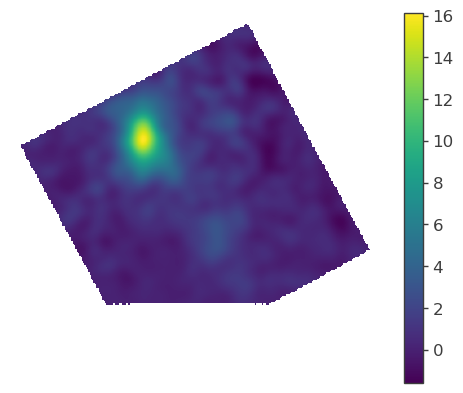

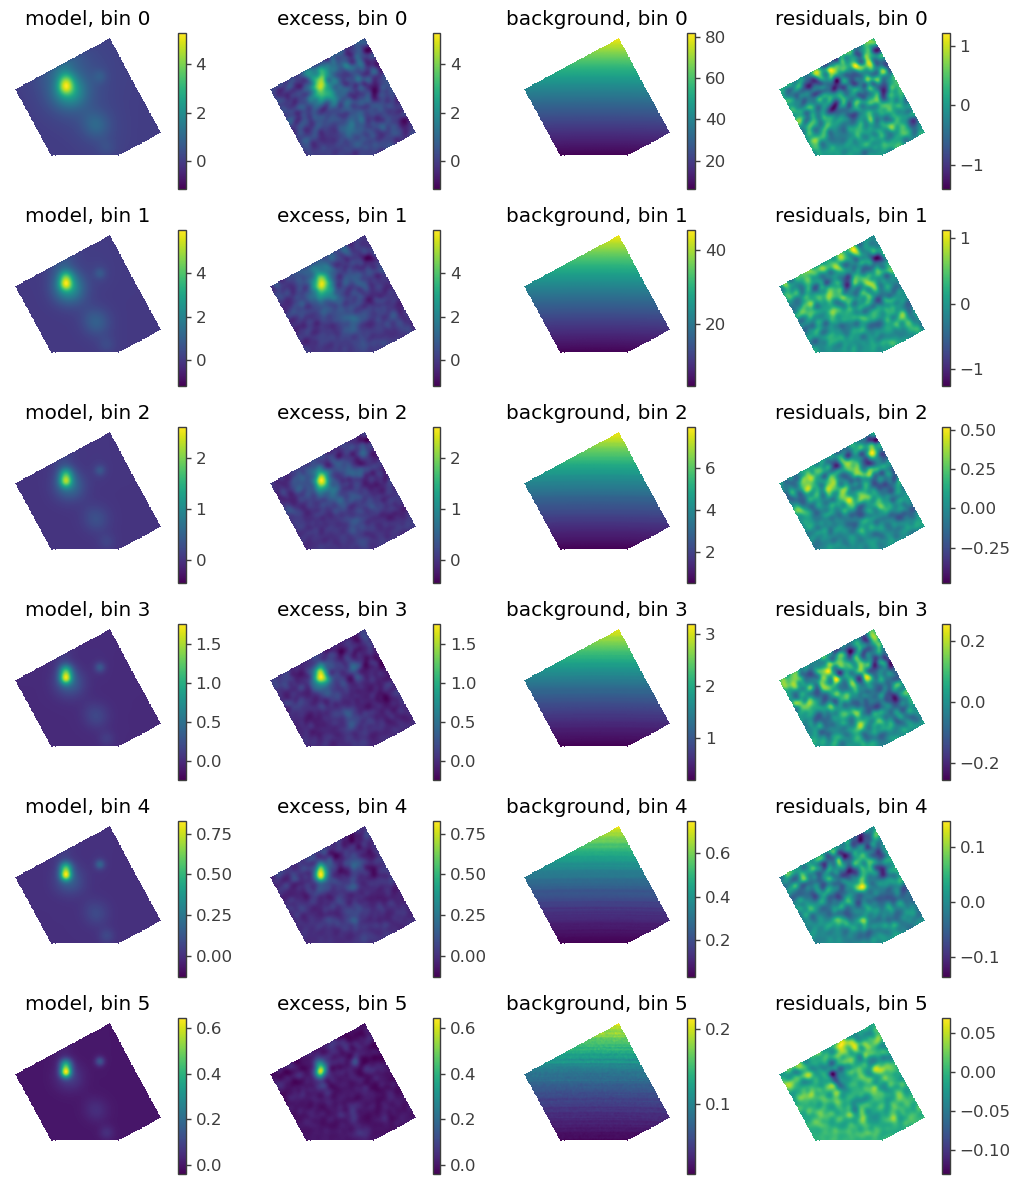

<Figure size 640x480 with 0 Axes>

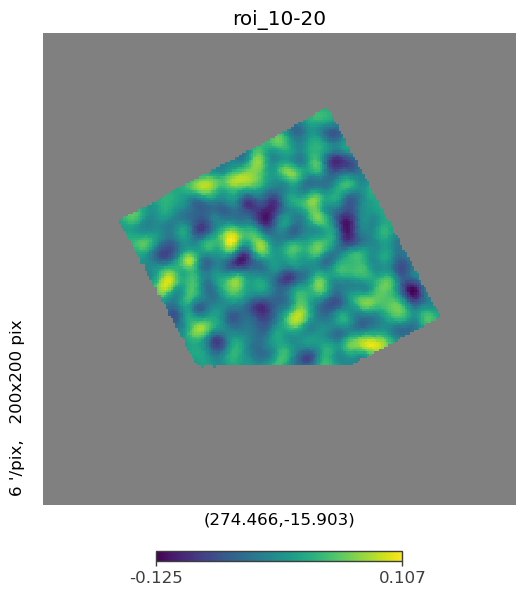

LHAASO:  1 272.38 -19.3  1LHAASO J1809-1918u  0.0
LHAASO:  2 272.66 -19.32  1LHAASO J1809-1918u   0.35
LHAASO:  3 273.36 -12.75  1LHAASO J1813-1245  0.0
LHAASO:  4 273.35 -12.73  1LHAASO J1813-1245   0.0
LHAASO:  5 273.69 -17.33 1LHAASO J1814-1719u*  0.71
LHAASO:  6 273.27 -17.89 1LHAASO J1814-1719u*   0.0
LHAASO:  7 273.72 -16.62  1LHAASO J1814-1636u  0.68
LHAASO:  8 273.72 -16.62  1KM2A J1814-1636u  0
LHAASO:  9 276.29 -14.32 1LHAASO J1825-1418  0.81
LHAASO:  10 276.25 -14.0 1LHAASO J1825-1418   0.81
LHAASO:  11 276.44 -12.94  1LHAASO J1825-1256u  0.0
LHAASO:  12 276.55 -13.04  1LHAASO J1825-1256u   0.24
LHAASO:  13 276.45 -13.63  1LHAASO J1825-1337u  0.0
LHAASO:  14 276.55 -13.73  1LHAASO J1825-1337u   0.17
LHAASO:  15 277.75 -10.12 1LHAASO J1831-1007u*  0.78
LHAASO:  16 277.81 -9.83 1LHAASO J1831-1007u*   0.26
LHAASO:  17 277.84 -10.48  1LHAASO J1831-1028  0.94
LHAASO:  18 277.84 -10.48  1KM2A J1831-1028  0
TeVCat:  1 271.12999999999994 -21.7 HESS J1804-216 0.16
TeVCat:  2 272.1554

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.2 +/- 1.0) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1287.019827
total        1287.019827

Values of statistical measures:

statistical measures
AIC           2576.039679
BIC           2586.067258

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (5.5 +/- 1.1) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1253.585673
total        1253.585673

Values of statistical measures:

statistical measures
AIC            2509.17137
BIC            2519.19895

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (8.6 +/- 1.7) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1227.501965
total        1227.501965

Values of statistical measures:

statistical measures
AIC           2457.003955
BIC           2467.031534

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (6.1 +/- 1.8) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1         1134.1484
total          1134.1484

Values of statistical measures:

statistical measures
AIC           2270.296825
BIC           2280.324404

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.0 +/- 2.2) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1        988.929544
total         988.929544

Values of statistical measures:

statistical measures
AIC           1979.859112
BIC           1989.886691

Best fit values:

result             unit
parameter                                                                  
Diffuse.spectrum.main.PowerlawM.K  (-1.6 +/- 2.3) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1         942.94014
total          942.94014

Values of statistical measures:

statistical measures
AIC           1887.880304
BIC           1897.907883

100%|██████████| 6/6 [01:46<00:00, 17.72s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



18:05:42 INFO      Region of Interest:                                                                   ]8;id=422374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=577924;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=799160;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=4530;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (279.224, -7.055), model radius:      ]8;id=438078;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=757447;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.500 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=464908;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=411519;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

18:05:43 INFO      Flat sky projection:                                                                  ]8;id=454209;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=888336;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=797654;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=433342;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 280 x 280 px                                                           ]8;id=858088;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=375086;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.05 deg                                                                 ]8;id=375759;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=546474;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=835301;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=645553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=267488;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=805274;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=251029;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=422303;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=306044;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=684779;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=936054;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=690785;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=356942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=324623;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=749217;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=221915;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=826385;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=959232;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=623552;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=810191;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  3.332536e+06  3.291720e+06  1.012399          30462  \
1   1   1024   RING  1.844727e+06  1.805256e+06  1.021864          30462   
2   2   1024   RING  3.329679e+05  3.195947e+05  1.041844          30462   
3   3   1024   RING  1.383612e+05  1.293840e+05  1.069384          30462   
4   4   1024   RING  3.427138e+04  3.120261e+04  1.098350          30462   
5   5   1024   RING  1.002656e+04  8.726789e+03  1.148940          30462   

   Area (deg^2)  
0     99.869387  
1     99.869387  
2     99.869387  
3     99.869387  
4     99.869387  
5     99.869387

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=541227;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=662832;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=600602;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=434494;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=626700;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=720397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=894516;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=229228;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=262440;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=7921;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=521396;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=245099;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

18:05:44 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=739426;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=897675;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

18:05:45 INFO      J1825M1256u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=27695;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=100020;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=920585;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=185829;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.27e-13 kb=(1.70e-14, 1.64e-12) index=-2.61 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=323881;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=118156;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.24 sb=(0.00,0.48) fitrange=0.64                                                         

         INFO      J1831M1007u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=725058;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=920353;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=841901;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=391763;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.78e-12 kb=(1.90e-13, 3.37e-12) index=-2.71 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=65153;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=540400;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.78 sb=(0.46,1.10) fitrange=1.28                                                         

         INFO      J1834M0831 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=707110;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=632179;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=955673;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=605045;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=5.99e-13 kb=(1.00e-15, 2.23e-12) index=-3.08 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=893413;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=705456;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.40 sb=(0.00,0.96) fitrange=1.76                                                         

         INFO      J1837M0654u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=210247;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=120061;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=532350;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=950859;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.55e-12 kb=(7.40e-13, 2.36e-12) index=-2.92 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=666704;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=818004;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.34 sb=(0.26,0.42) fitrange=0.48                                                         

         INFO      J1839M0548u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=601089;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=357904;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=241713;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=861824;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.62e-13 kb=(2.70e-14, 8.97e-13) index=-2.65 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=977779;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=994748;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.22 sb=(0.06,0.38) fitrange=0.56                                                         

         INFO      J1841M0519 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=415060;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=885911;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=302882;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=739958;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.52e-12 kb=(2.60e-13, 2.78e-12) index=-2.88 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=573788;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=846019;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.60 sb=(0.36,0.84) fitrange=0.72                                                         

         INFO      J1843M0335u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=376564;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=890568;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=432781;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=385084;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=9.01e-13 kb=(2.56e-13, 1.55e-12) index=-2.58 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=522137;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=543426;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.40 sb=(0.24,0.56) fitrange=0.48                                                         

         INFO      J1848M0153u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=631062;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=191256;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=53389;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=466369;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.05e-13 kb=(1.05e-13, 1.31e-12) index=-2.65 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=756235;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=441716;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.51 sb=(0.27,0.75) fitrange=0.80                                                         

         INFO      Set diffuse range: [16, 32] [-8, 8]                                                ]8;id=827481;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=155980;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=92;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=346658;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (282.3971868669157, -18.67103691732179)                                            ]8;id=320003;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=948690;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (289.571114573899, -4.461831948352712)                                             ]8;id=783513;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=149837;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (275.3109909197462, 2.815868161208608)                                             ]8;id=347067;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=104495;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (267.77321966772695, -11.14033752991717)                                           ]8;id=971114;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=689355;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=69874;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=999625;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.2224884265838792e-05                                                ]8;id=489758;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=521992;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.0964733728670671                                                                        

         INFO      set K to: 1e-12                                                                    ]8;id=194363;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=386577;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case9_dust_bkg_template.fits            ]8;id=520231;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=418768;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  9
Particle sources  0

Free parameters (14):
--------------------

                                         value min_value max_value   
J1831M1007u.spectrum.main.Powerlaw.K       0.0       0.0       0.0  \
J1831M1007u.spectrum.main.Powerlaw.index -2.71      -4.0      -1.0   
J1834M0831.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1834M0831.spectrum.main.Powerlaw.index  -3.08      -4.0      -1.0   
J1837M0654u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1837M0654u.spectrum.main.Powerlaw.index -2.92      -4.0      -1.0   
J1839M0548u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1839M0548u.spectrum.main.Powerlaw.index -2.65      -4.0      -1.0   
J1841M0519.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1841M0519.spectrum.main.Powerlaw.index  -2.88      -4.0      -1.0   
J1843M0335u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1843M0335u.spectrum.main.Powerlaw.index -2.58      -4.0      -1.0   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1831M1007u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1831M1007u.spectrum.main.Powerlaw.index                  
J1834M0831.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1834M0831.spectrum.main.Powerlaw.index                   
J1837M0654u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1837M0654u.spectrum.main.Powerlaw.index                  
J1839M0548u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1839M0548u.spectrum.main.Powerlaw.index                  
J1841M0519.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1841M0519.spectrum.main.Powerlaw.index                   
J1843M0335u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1843M0335u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (40):
---------------------

                                                                                      value   
J1825M1256u.Gaussian_on_sphere.lon0                                                  276.55  \
J1825M1256u.Gaussian_on_sphere.lat0                                                  -13.04   
J1825M1256u.Gaussian_on_sphere.sigma                                                   0.24   
J1825M1256u.spectrum.main.Powerlaw.K                                                    0.0   
J1825M1256u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1825M1256u.spectrum.main.Powerlaw.index                                              -2.61   
J1831M1007u.Gaussian_on_sphere.lon0                                                  277.75   
J1831M1007u.Gaussian_on_sphere.lat0                                                  -10.12   
J1831M1007u.Gaussian_on_sphere.sigma                                                   0.78   
J1831M1007u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1834M0831.Gaussian_on_sphere.lon0                                                   278.62   
J1834M0831.Gaussian_on_sphere.lat0                                                    -8.53   
J1834M0831.Gaussian_on_sphere.sigma                                                     0.4   
J1834M0831.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1837M0654u.Gaussian_on_sphere.lon0                                                  279.39   
J1837M0654u.Gaussian_on_sphere.lat0                                                    -6.9   
J1837M0654u.Gaussian_on_sphere.sigma                                                   0.34   
J1837M0654u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1839M0548u.Gaussian_on_sphere.lon0                     

18:05:48 INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=503858;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=722570;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=448061;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=860293;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=748410;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=662705;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=283169;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=951215;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=149341;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=844659;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=402236;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=246065;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=540783;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=374478;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=618190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=480494;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=923159;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=505387;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=776678;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=68403;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=402934;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=778484;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=380271;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=578478;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=24024;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=846799;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=518066;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=613739;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=641753;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=217172;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=812001;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=918171;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=27498;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=192158;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -7.794                      ]8;id=800391;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=567296;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=484865;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=997507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=42359;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=226736;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                               
J1831M1007u.spectrum.main.Powerlaw.K      (1.22 -0.11 +0.12) x 10^-21  \
J1831M1007u.spectrum.main.Powerlaw.index               -2.65 +/- 0.05   
J1834M0831.spectrum.main.Powerlaw.K          (3.9 -0.5 +0.6) x 10^-22   
J1834M0831.spectrum.main.Powerlaw.index                -2.99 +/- 0.11   
J1837M0654u.spectrum.main.Powerlaw.K         (1.35 +/- 0.05) x 10^-21   
J1837M0654u.spectrum.main.Powerlaw.index             -2.894 +/- 0.030   
J1839M0548u.spectrum.main.Powerlaw.K           (4.2 +/- 0.4) x 10^-22   
J1839M0548u.spectrum.main.Powerlaw.index               -2.68 +/- 0.06   
J1841M0519.spectrum.main.Powerlaw.K          (1.22 +/- 0.06) x 10^-21   
J1841M0519.spectrum.main.Powerlaw.index                -2.80 +/- 0.04   
J1843M0335u.spectrum.main.Powerlaw.K           (7.7 +/- 0.4) x 10^-22   
J1843M0335u.spectrum.main.Powerlaw.index             -2.539 +/- 0.035   
Diffuse.spectrum.main.Powerlaw.K               (3.4 +/- 0.4) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                   -2.70 +/- 0.06   

                                                     unit  
parameter                                                  
J1831M1007u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1831M1007u.spectrum.main.Powerlaw.index                   
J1834M0831.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1834M0831.spectrum.main.Powerlaw.index                    
J1837M0654u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1837M0654u.spectrum.main.Powerlaw.index                   
J1839M0548u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1839M0548u.spectrum.main.Powerlaw.index                   
J1841M0519.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1841M0519.spectrum.main.Powerlaw.index                    
J1843M0335u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1843M0335u.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.78 -0.07  0.11  0.14 -0.03 ...  0.14 -0.04  0.20 -0.10 -0.37  0.16
-0.78  1.00  0.12 -0.08 -0.05  0.06 ... -0.05  0.06 -0.08  0.09  0.16 -0.28
-0.07  0.12  1.00 -0.46  0.04  0.06 ...  0.17 -0.03  0.21 -0.09 -0.40  0.07
 0.11 -0.08 -0.46  1.00  0.06 -0.01 ... -0.02  0.05 -0.04  0.07  0.07 -0.22
 0.14 -0.05  0.04  0.06  1.00 -0.55 ...  0.11  0.01  0.20 -0.10 -0.36  0.12
-0.03  0.06  0.06 -0.01 -0.55  1.00 ...  0.02 -0.01 -0.05  0.07  0.08 -0.19
 0.02 -0.01  0.02 -0.01 -0.19  0.11 ... -0.46  0.26  0.08 -0.06 -0.05  0.04
-0.01  0.02  0.00  0.01  0.15 -0.11 ...  0.32 -0.34 -0.05  0.05  0.02 -0.07
 0.14 -0.05  0.17 -0.02  0.11  0.02 ...  1.00 -0.56  0.07  0.00 -0.39  0.15
-0.04  0.06 -0.03  0.05  0.01 -0.01 ... -0.56  1.00  0.03 -0.02  0.12 -0.23
 0.20 -0.08  0.21 -0.04  0.20 -0.05 ...  0.07  0.03  1.00 -0.78 -0.54  0.25
-0.10  0.09 -0.09  0.07 -0.10  0.07 ...  0.00 -0.02 -0.78  1.00  0.29 -0.32
-0.37  0.16 -0.40  0.07 -0.36  0.08 ... -0.39  0.12 -0.54  0.29  1.00 -0.46
 0.16 -0.28  0.07 -0.22  0.12 -0.19 ...  0.15 -0.23  0.25 -0.32 -0.46  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8489.796103
total       8489.796103

Values of statistical measures:

statistical measures
AIC          17007.594504
BIC          17149.216133

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

18:11:59 INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=812484;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=79530;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=655898;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=62919;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=35507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=75387;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=796652;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=904780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=269776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=995070;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=842191;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=661051;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=219343;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=555395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=982898;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=5303;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=641262;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=889692;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=751848;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=213296;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=917098;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=255657;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=110887;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=472352;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=965787;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=629843;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=253205;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=170693;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=46036;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=395666;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=178056;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=361565;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=667895;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=553076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -7.794                      ]8;id=113490;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=955166;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(280.1953125, -7.66978332733278)


<Figure size 640x480 with 0 Axes>

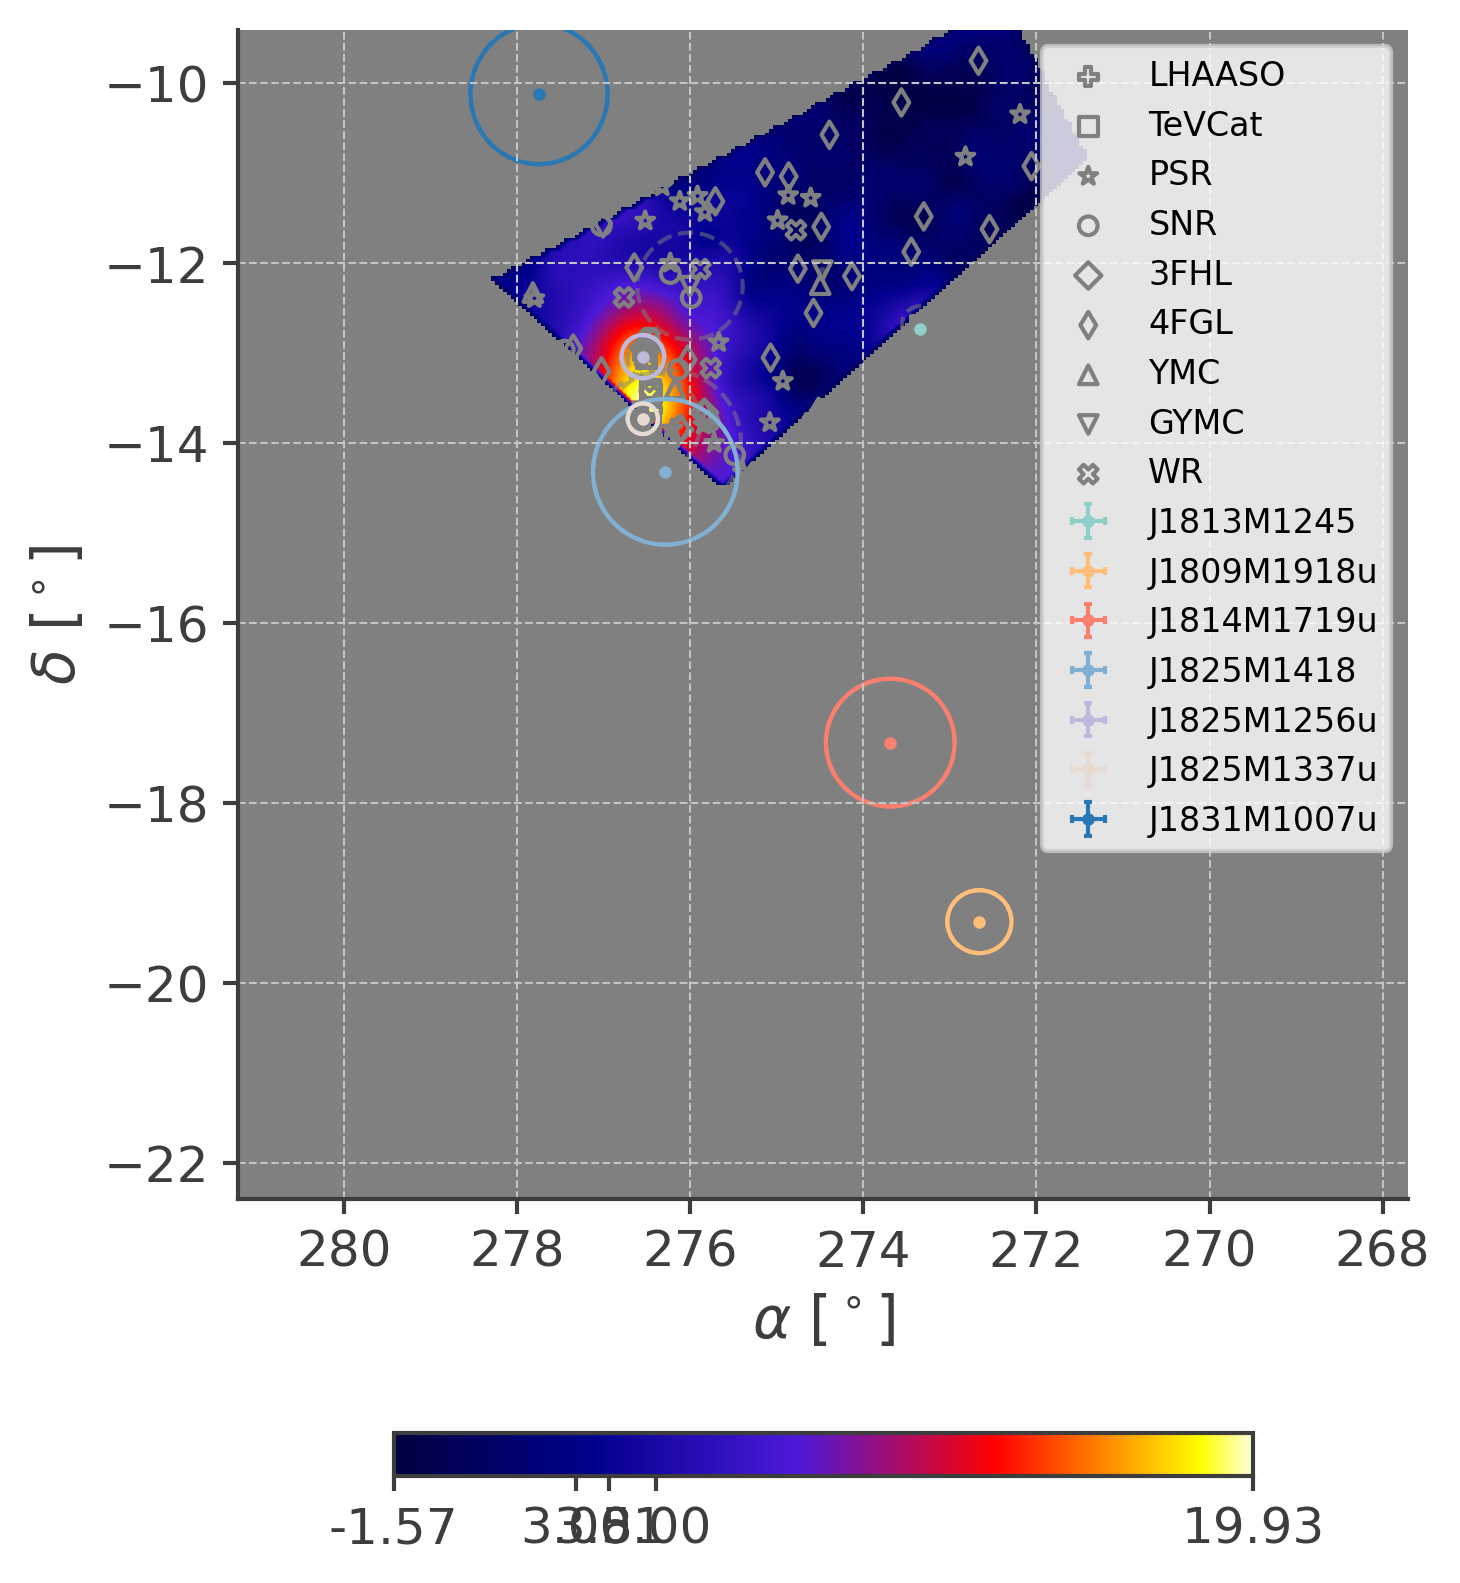

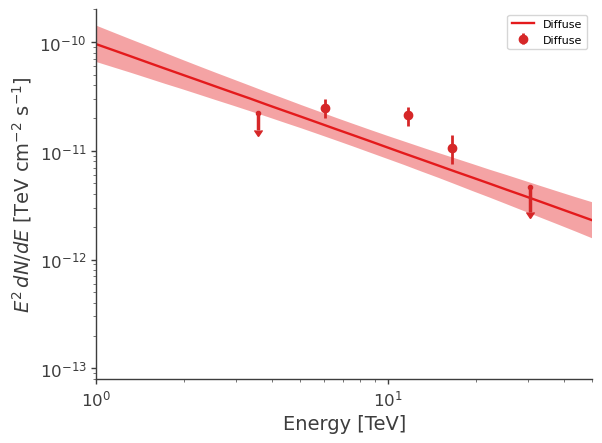

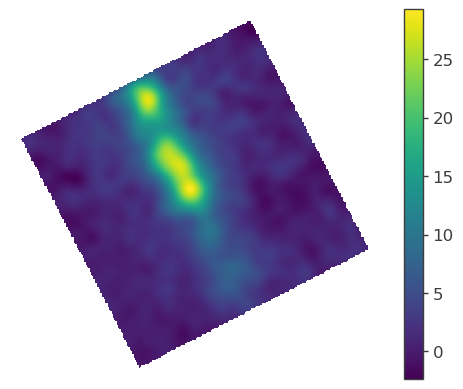

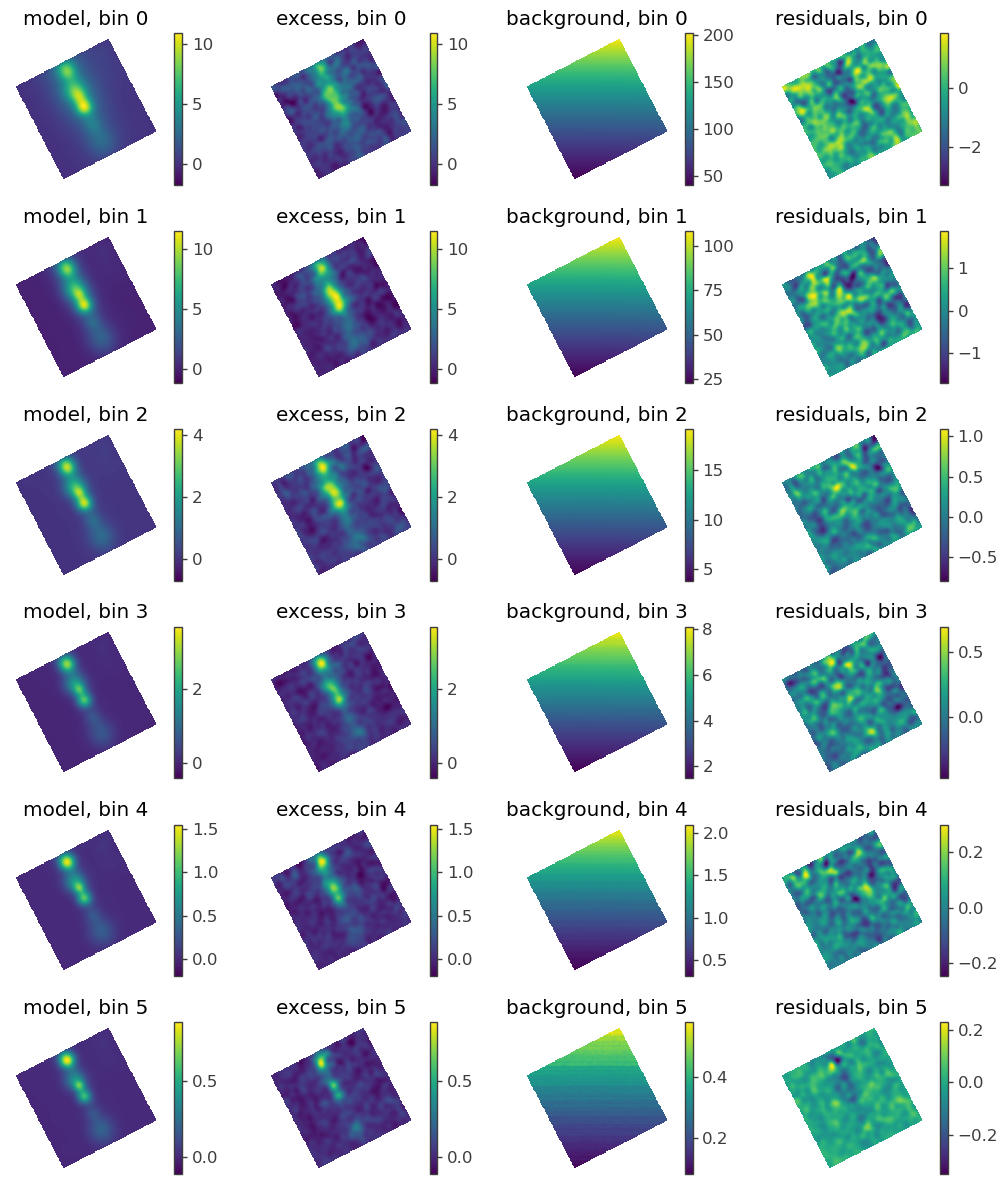

<Figure size 640x480 with 0 Axes>

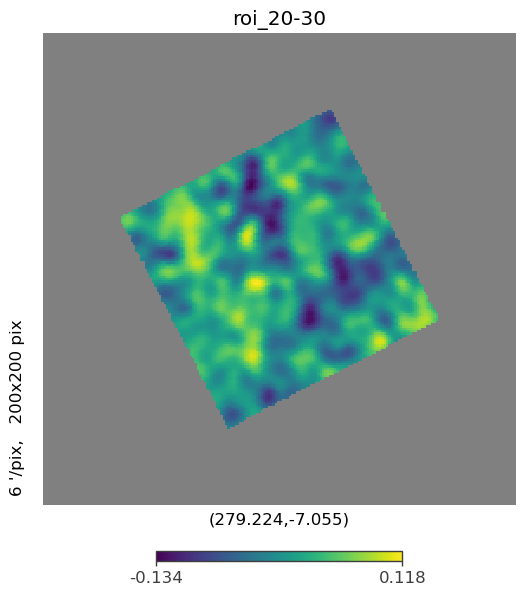

LHAASO:  1 273.36 -12.75  1LHAASO J1813-1245  0.0
LHAASO:  2 273.35 -12.73  1LHAASO J1813-1245   0.0
LHAASO:  3 276.44 -12.94  1LHAASO J1825-1256u  0.0
LHAASO:  4 276.55 -13.04  1LHAASO J1825-1256u   0.24
LHAASO:  5 277.75 -10.12 1LHAASO J1831-1007u*  0.78
LHAASO:  6 277.81 -9.83 1LHAASO J1831-1007u*   0.26
LHAASO:  7 277.84 -10.48  1LHAASO J1831-1028  0.94
LHAASO:  8 277.84 -10.48  1KM2A J1831-1028  0
LHAASO:  9 278.62 -8.53 1LHAASO J1834-0831  0.4
LHAASO:  10 278.44 -8.38 1LHAASO J1834-0831   0.4
LHAASO:  11 279.39 -6.9 1LHAASO J1837-0654u  0.34
LHAASO:  12 279.31 -6.86 1LHAASO J1837-0654u   0.33
LHAASO:  13 279.79 -5.81  1LHAASO J1839-0548u  0.22
LHAASO:  14 279.85 -5.9  1LHAASO J1839-0548u   0.22
LHAASO:  15 280.33 -5.33 1LHAASO J1841-0519  0.6
LHAASO:  16 280.21 -5.23 1LHAASO J1841-0519   0.62
LHAASO:  17 280.91 -3.6  1LHAASO J1843-0335u  0.36
LHAASO:  18 281.01 -3.5  1LHAASO J1843-0335u   0.4
LHAASO:  19 282.06 -1.89 1LHAASO J1848-0153u  0.51
LHAASO:  20 282.02 -1.78 1LHAASO J184

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (7 +/- 4) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1520.487208
total        1520.487208

Values of statistical measures:

statistical measures
AIC           3042.974437
BIC           3053.090410

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (4.2 +/- 0.4) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1502.025852
total        1502.025852

Values of statistical measures:

statistical measures
AIC           3006.051726
BIC           3016.167699

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (5.7 +/- 0.5) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1413.589073
total        1413.589073

Values of statistical measures:

statistical measures
AIC           2829.178168
BIC           2839.294141

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (6.1 +/- 0.5) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1441.725945
total        1441.725945

Values of statistical measures:

statistical measures
AIC           2885.451913
BIC           2895.567886

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (2.5 +/- 0.6) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1293.516593
total        1293.516593

Values of statistical measures:

statistical measures
AIC           2589.033207
BIC           2599.149180

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (0 +/- 6) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1258.414508
total        1258.414508

Values of statistical measures:

statistical measures
AIC           2518.829037
BIC           2528.945010


100%|██████████| 6/6 [01:45<00:00, 17.60s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



18:15:13 INFO      Region of Interest:                                                                   ]8;id=414526;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=661482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=881791;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=428267;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (283.803, 1.840), model radius: 7.000 ]8;id=376882;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=820309;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  deg, display radius: 6.500 deg, threshold = 0.50                                                 

         INFO                                                                                            ]8;id=332571;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=615373;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=574726;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=897929;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=772313;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=213912;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 280 x 280 px                                                           ]8;id=807963;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=226328;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.05 deg                                                                 ]8;id=911982;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=904218;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=963428;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=623049;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=551349;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=601306;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=203407;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=989577;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=670974;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=984088;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=102997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=996371;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=986277;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=570543;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=137904;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=886306;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=196032;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=577721;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=172416;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=411815;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  7.390070e+06  7.330045e+06  1.008189          30468  \
1   1   1024   RING  3.956166e+06  3.889984e+06  1.017013          30468   
2   2   1024   RING  7.105932e+05  6.856241e+05  1.036418          30468   
3   3   1024   RING  3.047246e+05  2.890172e+05  1.054347          30468   
4   4   1024   RING  8.072533e+04  7.464780e+04  1.081416          30468   
5   5   1024   RING  2.268091e+04  2.017328e+04  1.124305          30468   

   Area (deg^2)  
0     99.889058  
1     99.889058  
2     99.889058  
3     99.889058  
4     99.889058  
5     99.889058

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=13884;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=262095;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=622453;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=782158;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=267279;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=91743;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=633885;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=556;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=575928;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=575433;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=855608;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=661713;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

18:15:14 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=310219;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=897611;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

18:15:15 INFO      J1843M0335u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=301903;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=475018;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=749712;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=415234;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=9.01e-13 kb=(2.56e-13, 1.55e-12) index=-2.58 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=476267;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=847680;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.40 sb=(0.24,0.56) fitrange=0.48                                                         

         INFO      J1848M0153u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=817128;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=67564;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=944683;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=550633;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.05e-13 kb=(1.05e-13, 1.31e-12) index=-2.65 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=571344;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=884137;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.51 sb=(0.27,0.75) fitrange=0.80                                                         

         INFO      J1850M0004u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=521029;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=190308;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=471905;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=31761;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=5.30e-13 kb=(5.00e-14, 1.01e-12) index=-2.49 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=45840;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=9724;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.46 sb=(0.30,0.62) fitrange=0.64                                                         

         INFO      J1852P0050u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=264976;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=923796;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=648926;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=624776;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.67e-13 kb=(1.00e-15, 1.52e-12) index=-2.74 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=438896;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=440333;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.64 sb=(0.08,1.20) fitrange=1.60                                                         

         INFO      J1857P0245 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=328880;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=172830;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=783780;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=950128;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.04e-13 kb=(1.00e-15, 1.26e-12) index=-2.93 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=241513;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=290239;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.24 sb=(0.00,0.56) fitrange=0.88                                                         

         INFO      J1857P0203u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=965519;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=67386;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=920737;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=481190;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.68e-13 kb=(1.00e-15, 8.13e-13) index=-2.46 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=442135;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=675870;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.19 sb=(0.00,0.43) fitrange=0.88                                                         

         INFO      J1858P0330 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=769172;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=632161;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=449585;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=643172;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.84e-13 kb=(1.00e-15, 1.23e-12) index=-2.63 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=568409;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=480351;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.52 sb=(0.00,1.16) fitrange=2.72                                                         

         INFO      J1902P0648 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=312356;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=213400;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=343742;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=980709;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.50e-14 kb=(1.00e-15, 2.40e-13) index=-2.39 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=0.80                                                                  ]8;id=435852;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=335802;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#353\353]8;;\

         INFO      J1906P0712 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=754745;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=98946;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=195165;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=104497;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.01e-13 kb=(1.00e-15, 4.76e-13) index=-2.72 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=521619;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=903312;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.21 sb=(0.00,0.61) fitrange=1.68                                                         

         INFO      J1908P0615u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=413168;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=95033;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=496949;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=548201;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.97e-13 kb=(1.00e-15, 1.61e-12) index=-2.42 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=678927;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=573580;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.43 sb=(0.27,0.59) fitrange=0.40                                                         

         INFO      J1910P0516 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=88753;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=64919;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=438274;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=605837;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.60e-14 kb=(1.00e-15, 5.21e-13) index=-2.54 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=972840;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=322791;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.29 sb=(0.00,1.01) fitrange=3.04                                                         

         INFO      Set diffuse range: [27, 43] [-8, 8]                                                ]8;id=428932;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=509222;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=897824;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=591045;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (287.34086682842513, -8.890290164211233)                                           ]8;id=530619;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=928327;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (294.60929137943066, 5.198770996908663)                                            ]8;id=341575;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=199946;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (280.2214435932996, 12.564150815410274)                                            ]8;id=695972;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=918289;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (273.03715951687303, -1.5828020256848583)                                          ]8;id=135321;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=873307;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

18:15:16 INFO      total sr: 0.07772890321151499                                                      ]8;id=753032;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=751901;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.1918404748695861e-05                                                ]8;id=920387;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=489969;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.09405477224145048                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=52930;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=309359;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case9_dust_bkg_template.fits            ]8;id=121904;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=832994;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                   N
Point sources      1
Extended sources  11
Particle sources   0

Free parameters (16):
--------------------

                                         value min_value max_value   
J1848M0153u.spectrum.main.Powerlaw.K       0.0       0.0       0.0  \
J1848M0153u.spectrum.main.Powerlaw.index -2.65      -4.0      -1.0   
J1850M0004u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1850M0004u.spectrum.main.Powerlaw.index -2.49      -4.0      -1.0   
J1852P0050u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1852P0050u.spectrum.main.Powerlaw.index -2.74      -4.0      -1.0   
J1857P0245.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1857P0245.spectrum.main.Powerlaw.index  -2.93      -4.0      -1.0   
J1857P0203u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1857P0203u.spectrum.main.Powerlaw.index -2.46      -4.0      -1.0   
J1858P0330.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1858P0330.spectrum.main.Powerlaw.index  -2.63      -4.0      -1.0   
J1910P0516.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1910P0516.spectrum.main.Powerlaw.index  -2.54      -4.0      -1.0   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1848M0153u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1848M0153u.spectrum.main.Powerlaw.index                  
J1850M0004u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1850M0004u.spectrum.main.Powerlaw.index                  
J1852P0050u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1852P0050u.spectrum.main.Powerlaw.index                  
J1857P0245.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1857P0245.spectrum.main.Powerlaw.index                   
J1857P0203u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1857P0203u.spectrum.main.Powerlaw.index                  
J1858P0330.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1858P0330.spectrum.main.Powerlaw.index                   
J1910P0516.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1910P0516.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (55):
---------------------

                                                                                      value   
J1843M0335u.Gaussian_on_sphere.lon0                                                  281.01  \
J1843M0335u.Gaussian_on_sphere.lat0                                                    -3.5   
J1843M0335u.Gaussian_on_sphere.sigma                                                    0.4   
J1843M0335u.spectrum.main.Powerlaw.K                                                    0.0   
J1843M0335u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1843M0335u.spectrum.main.Powerlaw.index                                              -2.58   
J1848M0153u.Gaussian_on_sphere.lon0                                                  282.06   
J1848M0153u.Gaussian_on_sphere.lat0                                                   -1.89   
J1848M0153u.Gaussian_on_sphere.sigma                                                   0.51   
J1848M0153u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1850M0004u.Gaussian_on_sphere.lon0                                                  282.74   
J1850M0004u.Gaussian_on_sphere.lat0                                                   -0.07   
J1850M0004u.Gaussian_on_sphere.sigma                                                   0.46   
J1850M0004u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1852P0050u.Gaussian_on_sphere.lon0                                                  283.73   
J1852P0050u.Gaussian_on_sphere.lat0                                            

18:15:18 INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=187893;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=197567;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=146149;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=762056;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=50709;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=56730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=415309;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=458085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=686059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=605384;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=598601;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=74375;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1852P0050u           ]8;id=873380;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=482788;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=624056;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=707088;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=578054;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=466879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=723726;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=782132;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=738760;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=174572;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=785760;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=403579;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1858P0330            ]8;id=967747;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=770446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=369909;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=328485;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=26429;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=132575;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=916001;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=225116;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=74990;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=920603;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=794617;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=7458;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1910P0516            ]8;id=939671;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=104448;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=986437;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=121014;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=501821;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=5118;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.970                       ]8;id=421557;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=455986;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=224387;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=59467;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=823618;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=398313;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                               
J1848M0153u.spectrum.main.Powerlaw.K       (4.46 -0.34 +0.4) x 10^-22  \
J1848M0153u.spectrum.main.Powerlaw.index               -2.63 +/- 0.06   
J1850M0004u.spectrum.main.Powerlaw.K      (5.07 -0.30 +0.32) x 10^-22   
J1850M0004u.spectrum.main.Powerlaw.index               -2.44 +/- 0.04   
J1852P0050u.spectrum.main.Powerlaw.K       (2.13 -0.31 +0.4) x 10^-22   
J1852P0050u.spectrum.main.Powerlaw.index               -2.60 +/- 0.10   
J1857P0245.spectrum.main.Powerlaw.K       (3.47 -0.17 +0.18) x 10^-22   
J1857P0245.spectrum.main.Powerlaw.index                -2.80 +/- 0.05   
J1857P0203u.spectrum.main.Powerlaw.K      (1.66 -0.18 +0.20) x 10^-22   
J1857P0203u.spectrum.main.Powerlaw.index               -2.48 +/- 0.07   
J1858P0330.spectrum.main.Powerlaw.K       (1.94 -0.25 +0.29) x 10^-22   
J1858P0330.spectrum.main.Powerlaw.index                -2.56 +/- 0.10   
J1910P0516.spectrum.main.Powerlaw.K          (9.8 -1.5 +1.8) x 10^-23   
J1910P0516.spectrum.main.Powerlaw.index                -2.45 +/- 0.11   
Diffuse.spectrum.main.Powerlaw.K             (4.48 +/- 0.17) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                 -2.612 +/- 0.027   

                                                     unit  
parameter                                                  
J1848M0153u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1848M0153u.spectrum.main.Powerlaw.index                   
J1850M0004u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1850M0004u.spectrum.main.Powerlaw.index                   
J1852P0050u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1852P0050u.spectrum.main.Powerlaw.index                   
J1857P0245.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1857P0245.spectrum.main.Powerlaw.index                    
J1857P0203u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1857P0203u.spectrum.main.Powerlaw.index                   
J1858P0330.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1858P0330.spectrum.main.Powerlaw.index                    
J1910P0516.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1910P0516.spectrum.main.Powerlaw.index                    
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.65 -0.04  0.06  0.17 -0.04 ...  0.18 -0.08  0.05 -0.03 -0.38  0.11
-0.65  1.00  0.05 -0.03 -0.04  0.07 ... -0.07  0.10 -0.02  0.02  0.15 -0.28
-0.04  0.05  1.00 -0.81 -0.10  0.08 ...  0.11 -0.06  0.03 -0.02 -0.23  0.12
 0.06 -0.03 -0.81  1.00  0.09 -0.07 ... -0.06  0.07 -0.02  0.02  0.13 -0.19
 0.17 -0.04 -0.10  0.09  1.00 -0.53 ...  0.19 -0.06  0.05 -0.03 -0.40  0.07
-0.04  0.07  0.08 -0.07 -0.53  1.00 ... -0.06  0.08 -0.02  0.02  0.13 -0.25
 0.03 -0.02  0.03 -0.02 -0.05  0.04 ... -0.28  0.17  0.01 -0.01 -0.09  0.06
-0.01  0.03 -0.02  0.03  0.05 -0.04 ...  0.15 -0.19 -0.01  0.01  0.05 -0.12
 0.01 -0.01  0.07 -0.05 -0.30  0.16 ...  0.06 -0.04  0.01 -0.01 -0.05  0.05
-0.01  0.02 -0.04  0.04  0.20 -0.19 ... -0.04  0.04 -0.01  0.01  0.04 -0.08
 0.18 -0.07  0.11 -0.06  0.19 -0.06 ...  1.00 -0.64  0.05 -0.03 -0.48  0.18
-0.08  0.10 -0.06  0.07 -0.06  0.08 ... -0.64  1.00 -0.02  0.02  0.23 -0.32
 0.05 -0.02  0.03 -0.02  0.05 -0.02 ...  0.05 -0.02  1.00 -0.76 -0.13  0.06
-0.03  0.02 -0.02  0.02 -0.03  0.02 ... -0.03  0.02 -0.76  1.00  0.08 -0.07
-0.38  0.15 -0.23  0.13 -0.40  0.13 ... -0.48  0.23 -0.13  0.08  1.00 -0.40
 0.11 -0.28  0.12 -0.19  0.07 -0.25 ...  0.18 -0.32  0.06 -0.07 -0.40  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        9003.672982
total       9003.672982

Values of statistical measures:

statistical measures
AIC          18039.348941
BIC          18201.205032

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

18:24:25 INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=251623;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=87638;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=56476;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=433379;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=687077;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=328371;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=493919;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=904470;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=197509;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=88150;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=46491;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=950704;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1852P0050u           ]8;id=896739;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=507712;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=941032;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=870936;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=920739;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=883811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=920418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=796393;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=287539;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=886818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=284080;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=399374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1858P0330            ]8;id=494828;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=658258;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=290455;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=536556;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=332133;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=145185;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=100427;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=68581;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=112854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=224474;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=319991;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=778670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1910P0516            ]8;id=405251;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=531777;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=486812;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=831472;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=603960;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=331374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.970                       ]8;id=564395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=817499;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(286.61132812499994, -1.977395325411706)


<Figure size 640x480 with 0 Axes>

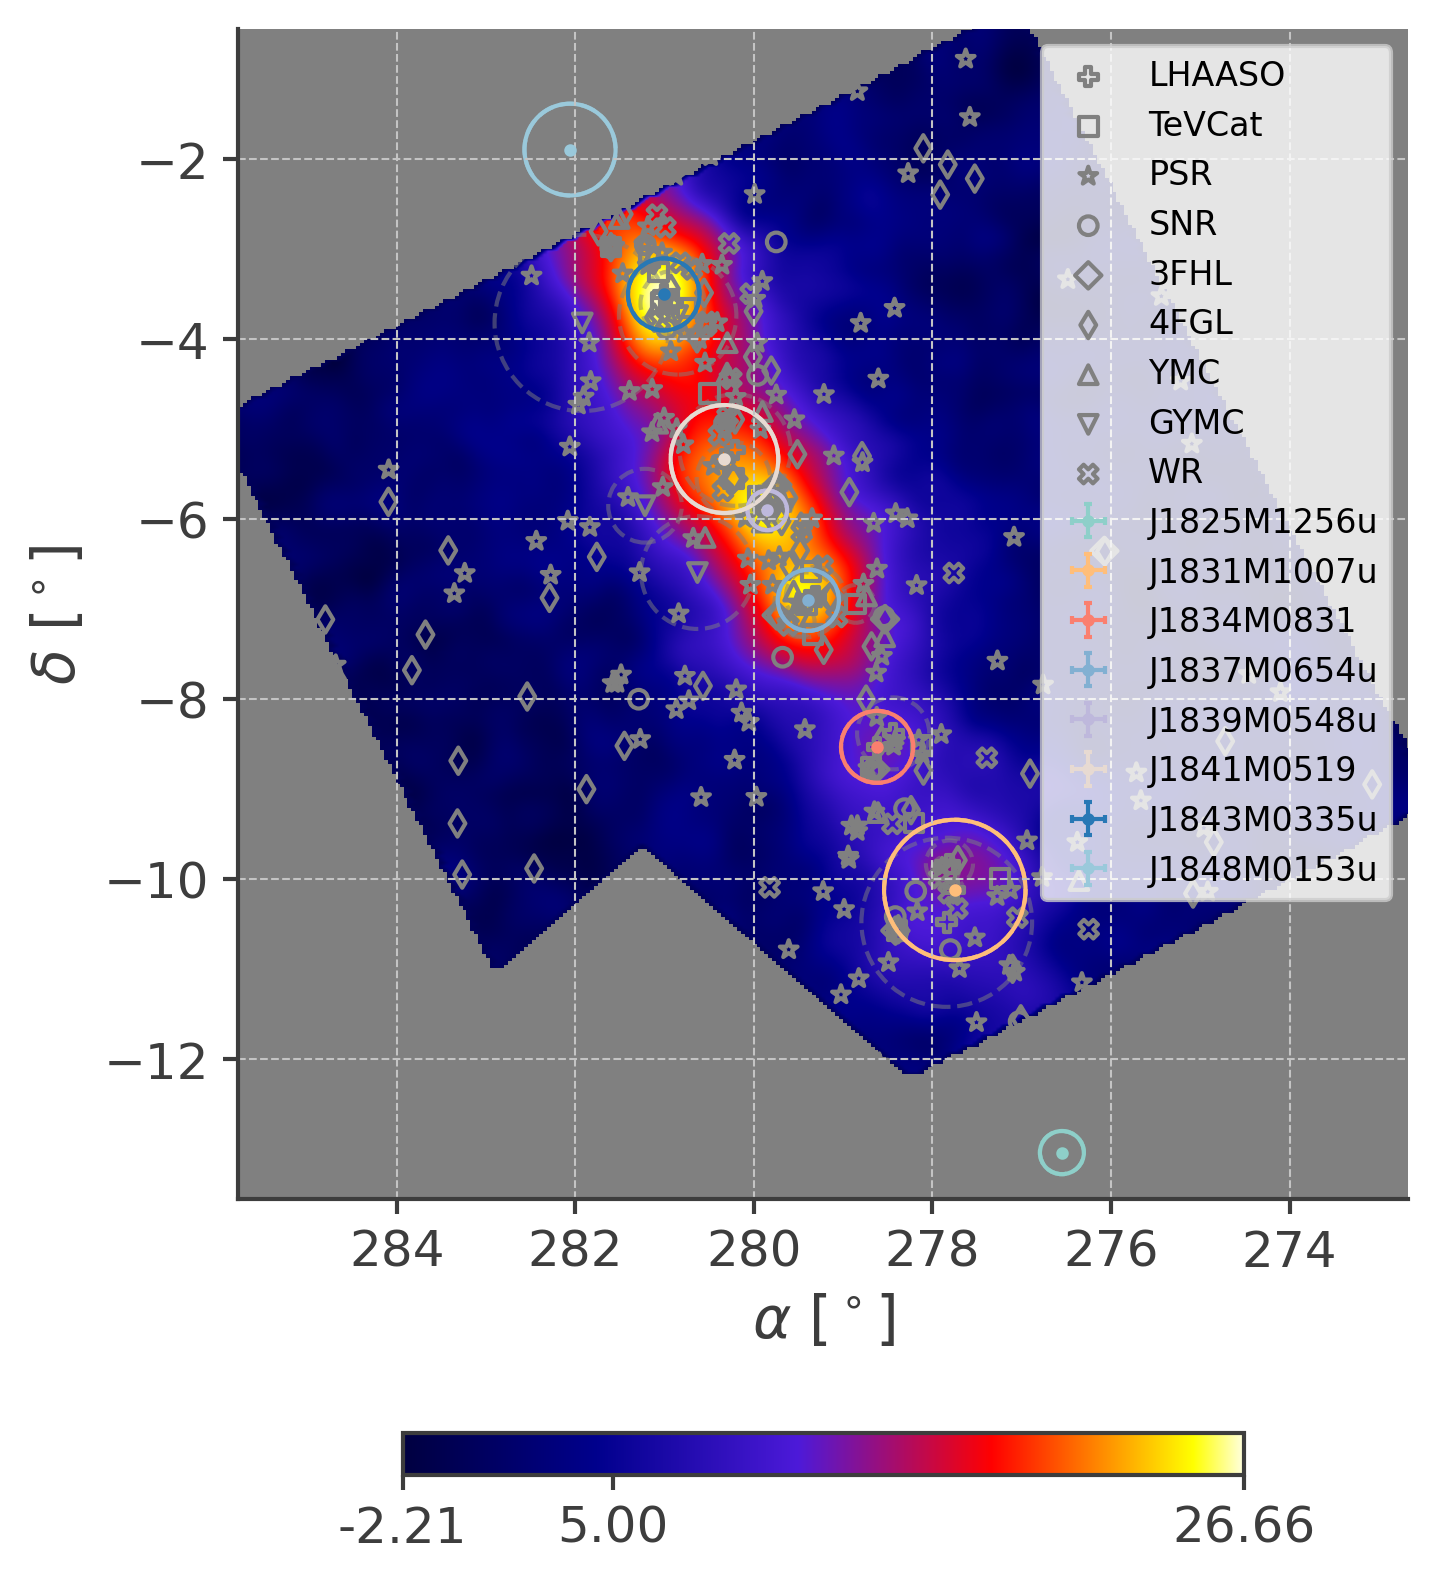

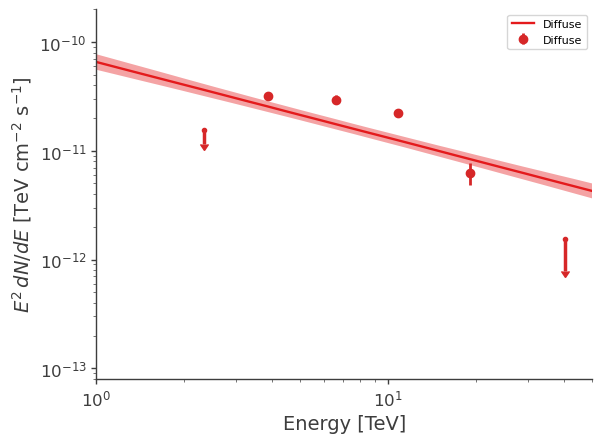

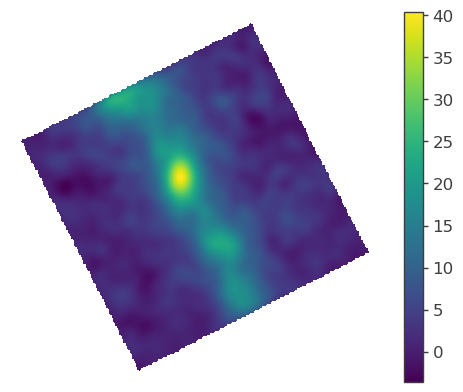

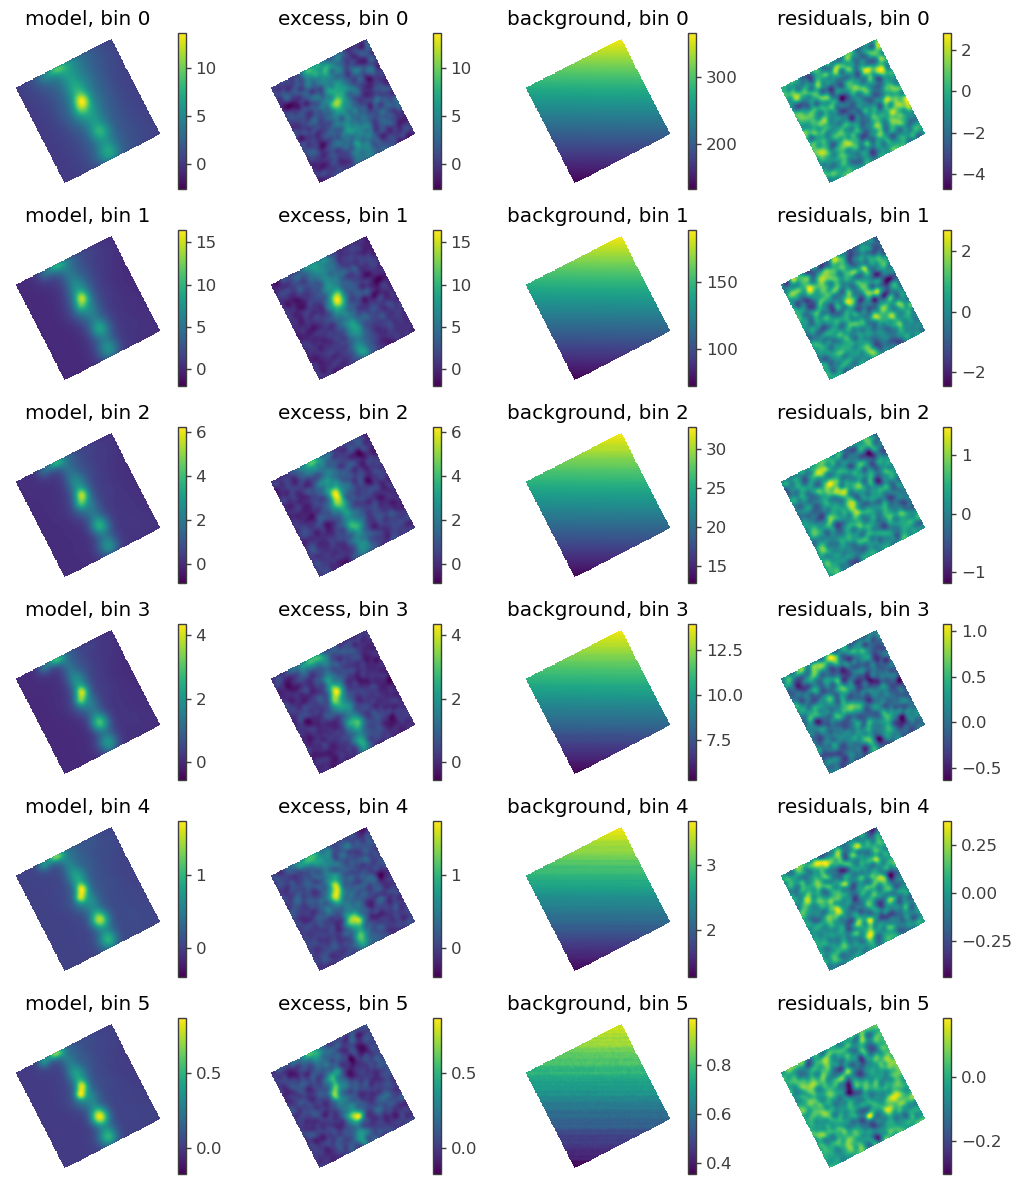

<Figure size 640x480 with 0 Axes>

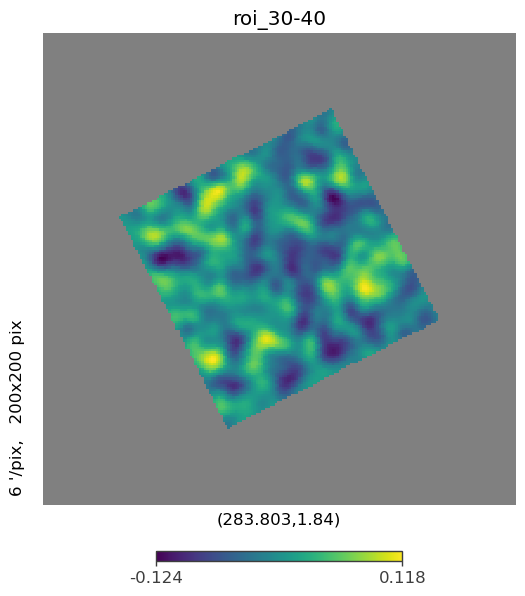

LHAASO:  1 280.91 -3.6  1LHAASO J1843-0335u  0.36
LHAASO:  2 281.01 -3.5  1LHAASO J1843-0335u   0.4
LHAASO:  3 282.06 -1.89 1LHAASO J1848-0153u  0.51
LHAASO:  4 282.02 -1.78 1LHAASO J1848-0153u   0.56
LHAASO:  5 282.19 -0.02  1LHAASO J1848-0001u  0.0
LHAASO:  6 282.19 -0.02  1KM2A J1848-0001u  0
LHAASO:  7 282.74 -0.07 1LHAASO J1850-0004u*  0.46
LHAASO:  8 282.89 -0.07 1LHAASO J1850-0004u*   0.21
LHAASO:  9 283.1 0.84  1LHAASO J1852+0050u*  0.85
LHAASO:  10 283.73 1.4  1LHAASO J1852+0050u*   0.64
LHAASO:  11 284.37 2.75 1LHAASO J1857+0245  0.24
LHAASO:  12 284.38 2.06  1WCDA J1857+0203u  0.28
LHAASO:  13 284.5 1.98  1LHAASO J1857+0203u   0.19
LHAASO:  14 284.59 3.51  1LHAASO J1858+0330  0.43
LHAASO:  15 284.79 3.7  1LHAASO J1858+0330   0.52
LHAASO:  16 285.58 6.8 1LHAASO J1902+0648  0.0
LHAASO:  17 286.56 7.2 1WCDA J1906+0712  0.21
LHAASO:  18 287.05 6.26  1WCDA J1908+0615u  0.36
LHAASO:  19 287.05 6.26  1LHAASO J1908+0615u   0.43
LHAASO:  20 287.55 5.28  1LHAASO J1910+0516*  0.0
LHAAS

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.59 +/- 0.24) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1513.744375
total        1513.744375

Values of statistical measures:

statistical measures
AIC           3029.488772
BIC           3039.604942

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (5.06 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1541.576924
total        1541.576924

Values of statistical measures:

statistical measures
AIC            3085.15387
BIC            3095.27004

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (6.19 +/- 0.26) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1556.956616
total        1556.956616

Values of statistical measures:

statistical measures
AIC           3115.913255
BIC           3126.029425

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (5.38 +/- 0.24) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1510.190398
total        1510.190398

Values of statistical measures:

statistical measures
AIC           3022.380819
BIC           3032.496989

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (4.23 +/- 0.29) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1389.463644
total        1389.463644

Values of statistical measures:

statistical measures
AIC           2780.927309
BIC           2791.043479

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.52 +/- 0.32) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1408.854593
total        1408.854593

Values of statistical measures:

statistical measures
AIC           2819.709207
BIC           2829.825377

100%|██████████| 6/6 [01:39<00:00, 16.65s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



18:27:57 INFO      Region of Interest:                                                                   ]8;id=854025;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=584525;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=743961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=454621;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (288.428, 10.724), model radius:      ]8;id=372708;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=967667;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.500 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=199066;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=747245;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=401824;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=240325;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=649844;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=719927;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 280 x 280 px                                                           ]8;id=756855;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=907954;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.05 deg                                                                 ]8;id=928865;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=692516;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=147444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=393924;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=930219;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=155903;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=467764;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=29993;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=81038;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=855005;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=769250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=348353;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=306546;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=212438;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=585724;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=115599;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=594554;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=237860;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=316864;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=559704;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  1.237750e+07  1.231712e+07  1.004902          30455  \
1   1   1024   RING  6.369569e+06  6.300819e+06  1.010911          30455   
2   2   1024   RING  1.108544e+06  1.085252e+06  1.021462          30455   
3   3   1024   RING  4.757899e+05  4.600890e+05  1.034126          30455   
4   4   1024   RING  1.287373e+05  1.218636e+05  1.056404          30455   
5   5   1024   RING  3.458448e+04  3.178466e+04  1.088087          30455   

   Area (deg^2)  
0     99.846437  
1     99.846437  
2     99.846437  
3     99.846437  
4     99.846437  
5     99.846437

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=13913;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=346526;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=298679;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=847390;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=125905;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=489886;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=550071;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=862724;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=74516;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=25732;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=64001;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=976798;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

18:27:58 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=273417;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=539607;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

18:27:59 INFO      J1902P0648 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=380834;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=762843;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=267392;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=938076;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.50e-14 kb=(1.00e-15, 2.40e-13) index=-2.39 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=0.80                                                                  ]8;id=17457;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=75569;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#353\353]8;;\

         INFO      J1906P0712 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=903158;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=481912;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=158520;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=710737;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.01e-13 kb=(1.00e-15, 4.76e-13) index=-2.72 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=783384;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=160715;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.21 sb=(0.00,0.61) fitrange=1.68                                                         

         INFO      J1907P0826 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=125485;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=369619;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=4585;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=668791;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.34e-13 kb=(1.00e-15, 5.69e-13) index=-2.62 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=858765;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=331631;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.43 sb=(0.00,1.07) fitrange=2.48                                                         

         INFO      J1908P0615u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=913051;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=60644;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=892807;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=463042;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.97e-13 kb=(1.00e-15, 1.61e-12) index=-2.42 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=553643;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=49254;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.43 sb=(0.27,0.59) fitrange=0.40                                                         

         INFO      J1910P0516 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=934212;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=487662;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=583323;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=701187;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.60e-14 kb=(1.00e-15, 5.21e-13) index=-2.54 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=496974;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=140905;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.29 sb=(0.00,1.01) fitrange=3.04                                                         

         INFO      J1912P1014u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=814479;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=402324;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=800050;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=560239;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=3.07e-13 kb=(1.00e-15, 6.67e-13) index=-2.68 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=16855;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=497856;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.36 sb=(0.12,0.60) fitrange=0.64                                                         

         INFO      J1914P1150u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=511979;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=190363;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=82395;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=790020;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.09e-13 kb=(1.00e-15, 2.89e-13) index=-2.34 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=618857;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=596644;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.33 sb=(0.01,0.65) fitrange=1.12                                                         

         INFO      J1922P1403 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=198495;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=186015;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=973811;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=715103;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.37e-13 kb=(1.00e-15, 2.87e-13) index=-2.62 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=190363;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=997653;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.18 sb=(0.02,0.34) fitrange=0.56                                                         

         INFO      J1924P1609 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=575325;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=767588;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=429465;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=613710;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.44e-13 kb=(1.00e-15, 1.06e-12) index=-2.54 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=832305;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=295860;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=1.45 sb=(0.57,2.33) fitrange=3.44                                                         

         INFO      Set diffuse range: [36, 52] [-8, 8]                                                ]8;id=399229;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=977184;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=257504;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=360925;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (291.3734095715683, -0.9333861386465837)                                           ]8;id=867584;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=331261;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (299.0292661469791, 12.971192391637747)                                            ]8;id=275512;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=625099;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (284.3072053919512, 20.571897552965403)                                            ]8;id=682407;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=908360;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (277.1024382189087, 6.351715544083082)                                             ]8;id=505472;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=142182;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=604;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=777740;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 9.926864854876973e-06                                                 ]8;id=777298;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=644384;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.07833842134781312                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=18942;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=721012;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case9_dust_bkg_template.fits            ]8;id=693018;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=801104;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  9
Particle sources  0

Free parameters (16):
--------------------

                                         value min_value max_value   
J1902P0648.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1902P0648.spectrum.main.Powerlaw.index  -2.39      -4.0      -1.0   
J1906P0712.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1906P0712.spectrum.main.Powerlaw.index  -2.72      -4.0      -1.0   
J1907P0826.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1907P0826.spectrum.main.Powerlaw.index  -2.62      -4.0      -1.0   
J1908P0615u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1908P0615u.spectrum.main.Powerlaw.index -2.42      -4.0      -1.0   
J1912P1014u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1912P1014u.spectrum.main.Powerlaw.index -2.68      -4.0      -1.0   
J1914P1150u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1914P1150u.spectrum.main.Powerlaw.index -2.34      -4.0      -1.0   
J1922P1403.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1922P1403.spectrum.main.Powerlaw.index  -2.62      -4.0      -1.0   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1902P0648.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1902P0648.spectrum.main.Powerlaw.index                   
J1906P0712.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1906P0712.spectrum.main.Powerlaw.index                   
J1907P0826.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1907P0826.spectrum.main.Powerlaw.index                   
J1908P0615u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1908P0615u.spectrum.main.Powerlaw.index                  
J1912P1014u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1912P1014u.spectrum.main.Powerlaw.index                  
J1914P1150u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1914P1150u.spectrum.main.Powerlaw.index                  
J1922P1403.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1922P1403.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (43):
---------------------

                                                                                     value   
J1902P0648.position.ra                                                              285.58  \
J1902P0648.position.dec                                                                6.8   
J1902P0648.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1906P0712.Gaussian_on_sphere.lon0                                                  286.56   
J1906P0712.Gaussian_on_sphere.lat0                                                     7.2   
J1906P0712.Gaussian_on_sphere.sigma                                                   0.21   
J1906P0712.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1907P0826.Gaussian_on_sphere.lon0                                                  286.96   
J1907P0826.Gaussian_on_sphere.lat0                                                    8.44   
J1907P0826.Gaussian_on_sphere.sigma                                                   0.43   
J1907P0826.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1908P0615u.Gaussian_on_sphere.lon0                                                 287.05   
J1908P0615u.Gaussian_on_sphere.lat0                                                   6.26   
J1908P0615u.Gaussian_on_sphere.sigma                                                  0.43   
J1908P0615u.spectrum.main.Powerlaw.piv                                        3000000000.0   
J1910P0516.Gaussian_on_sphere.lon0                                                  287.88   
J1910

18:28:02 INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=143054;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=318342;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=353734;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=667353;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1907P0826            ]8;id=90733;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=917518;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=333443;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=584597;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=924566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=202703;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=801978;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=112565;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=218546;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=16321;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=945827;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=505248;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=513937;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=922961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=414607;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=886444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1914P1150u           ]8;id=213597;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=780415;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=48067;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=901787;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=365464;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=898452;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=567798;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=541080;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 10 dec bins for extended source J1924P1609           ]8;id=860839;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=735668;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=448876;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=936242;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=774771;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=677780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 9.953                       ]8;id=785791;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=360220;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=299624;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=816528;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=580333;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=960015;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                               
J1902P0648.spectrum.main.Powerlaw.K          (4.4 -1.0 +1.3) x 10^-23  \
J1902P0648.spectrum.main.Powerlaw.index                -2.41 +/- 0.16   
J1906P0712.spectrum.main.Powerlaw.K       (1.01 -0.13 +0.15) x 10^-22   
J1906P0712.spectrum.main.Powerlaw.index                -2.65 +/- 0.12   
J1907P0826.spectrum.main.Powerlaw.K       (1.32 -0.16 +0.18) x 10^-22   
J1907P0826.spectrum.main.Powerlaw.index                -2.65 +/- 0.11   
J1908P0615u.spectrum.main.Powerlaw.K      (8.35 -0.23 +0.24) x 10^-22   
J1908P0615u.spectrum.main.Powerlaw.index             -2.420 +/- 0.023   
J1912P1014u.spectrum.main.Powerlaw.K      (2.78 -0.13 +0.14) x 10^-22   
J1912P1014u.spectrum.main.Powerlaw.index               -2.69 +/- 0.05   
J1914P1150u.spectrum.main.Powerlaw.K         (7.9 -1.4 +1.7) x 10^-23   
J1914P1150u.spectrum.main.Powerlaw.index               -2.31 +/- 0.13   
J1922P1403.spectrum.main.Powerlaw.K       (1.03 -0.09 +0.10) x 10^-22   
J1922P1403.spectrum.main.Powerlaw.index                -2.49 +/- 0.07   
Diffuse.spectrum.main.Powerlaw.K          (2.46 -0.13 +0.14) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                   -2.53 +/- 0.04   

                                                     unit  
parameter                                                  
J1902P0648.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1902P0648.spectrum.main.Powerlaw.index                    
J1906P0712.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1906P0712.spectrum.main.Powerlaw.index                    
J1907P0826.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1907P0826.spectrum.main.Powerlaw.index                    
J1908P0615u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1908P0615u.spectrum.main.Powerlaw.index                   
J1912P1014u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1912P1014u.spectrum.main.Powerlaw.index                   
J1914P1150u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1914P1150u.spectrum.main.Powerlaw.index                   
J1922P1403.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1922P1403.spectrum.main.Powerlaw.index                    
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.86 -0.10  0.09  0.06 -0.02 ...  0.07 -0.05  0.05 -0.04 -0.15  0.07
-0.86  1.00  0.09 -0.07 -0.04  0.03 ... -0.05  0.05 -0.04  0.03  0.11 -0.09
-0.10  0.09  1.00 -0.66 -0.10  0.09 ...  0.09 -0.06  0.07 -0.05 -0.20  0.10
 0.09 -0.07 -0.66  1.00  0.10 -0.07 ... -0.05  0.06 -0.05  0.05  0.11 -0.19
 0.06 -0.04 -0.10  0.10  1.00 -0.49 ...  0.20 -0.14  0.15 -0.09 -0.45  0.17
-0.02  0.03  0.09 -0.07 -0.49  1.00 ... -0.10  0.13 -0.07  0.08  0.19 -0.35
 0.01 -0.00 -0.29  0.23  0.10 -0.04 ...  0.10 -0.07  0.07 -0.04 -0.22  0.11
 0.00  0.00  0.22 -0.23 -0.04  0.05 ... -0.06  0.06 -0.04  0.04  0.12 -0.17
 0.06 -0.04  0.09 -0.05  0.13 -0.03 ...  0.07 -0.03  0.15 -0.10 -0.42  0.19
-0.02  0.03 -0.04  0.06 -0.02  0.07 ... -0.01  0.03 -0.07  0.08  0.18 -0.33
 0.07 -0.05  0.09 -0.05  0.20 -0.10 ...  1.00 -0.84  0.13 -0.08 -0.43  0.26
-0.05  0.05 -0.06  0.06 -0.14  0.13 ... -0.84  1.00 -0.09  0.06  0.31 -0.33
 0.05 -0.04  0.07 -0.05  0.15 -0.07 ...  0.13 -0.09  1.00 -0.68 -0.35  0.19
-0.04  0.03 -0.05  0.05 -0.09  0.08 ... -0.08  0.06 -0.68  1.00  0.23 -0.22
-0.15  0.11 -0.20  0.11 -0.45  0.19 ... -0.43  0.31 -0.35  0.23  1.00 -0.47
 0.07 -0.09  0.10 -0.19  0.17 -0.35 ...  0.26 -0.33  0.19 -0.22 -0.47  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8743.310941
total       8743.310941

Values of statistical measures:

statistical measures
AIC          17518.624859
BIC          17680.474121

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

18:36:23 INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=49564;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=336938;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=969702;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=810086;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1907P0826            ]8;id=434685;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=243360;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=922875;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=853811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=317023;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=772941;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=492416;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=27539;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=2379;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=876200;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=886588;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=170430;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=893067;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=79801;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=390971;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=257074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1914P1150u           ]8;id=129046;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=291110;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=216155;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=96260;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=888261;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=471847;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=339527;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=974110;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 10 dec bins for extended source J1924P1609           ]8;id=289369;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=793685;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=804430;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=518607;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=303270;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=172528;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 9.953                       ]8;id=740266;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=203354;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(288.50097656249994, 6.504500094011917)


<Figure size 640x480 with 0 Axes>

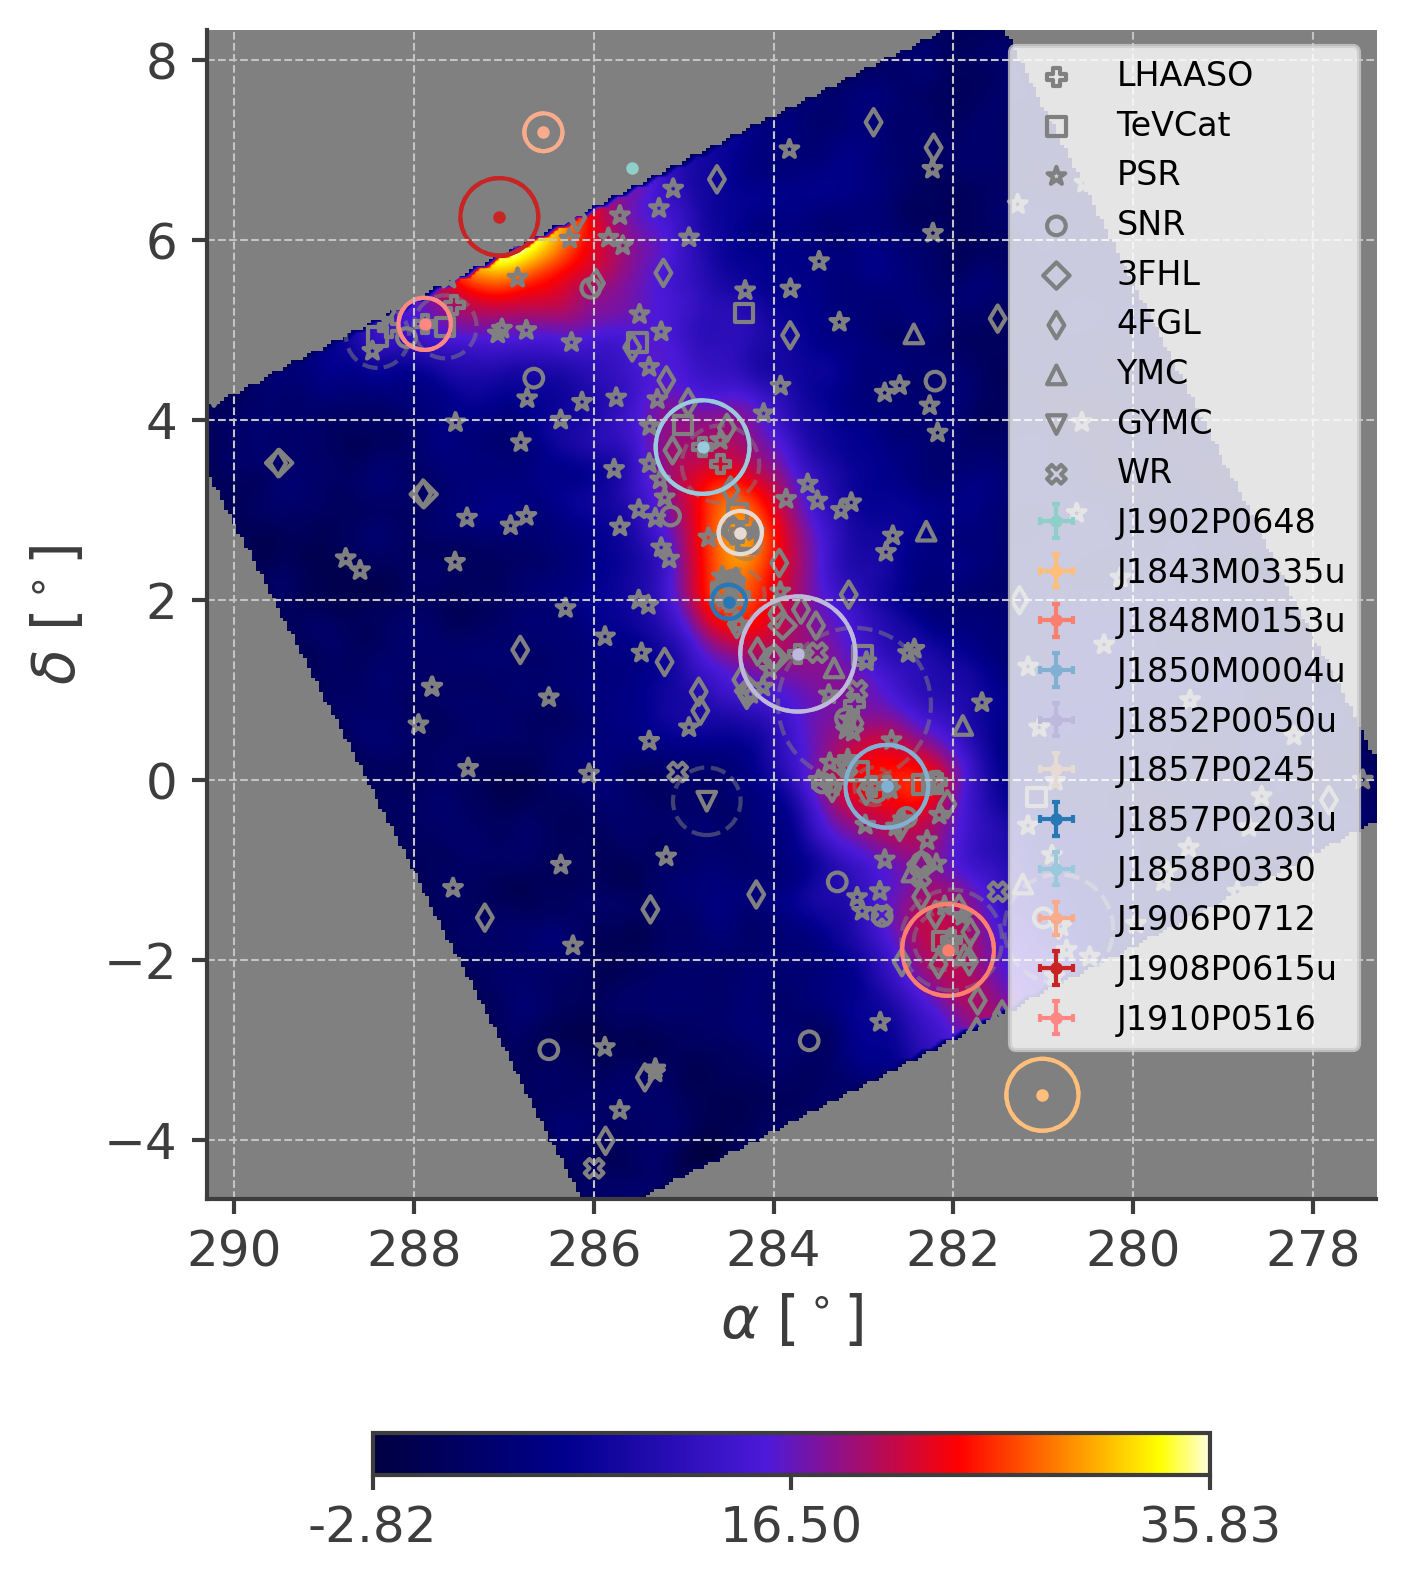

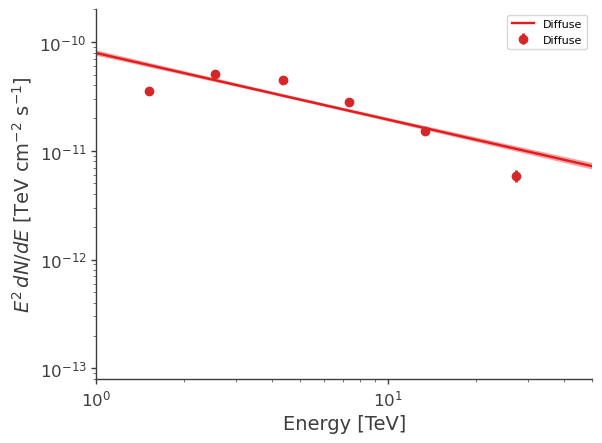

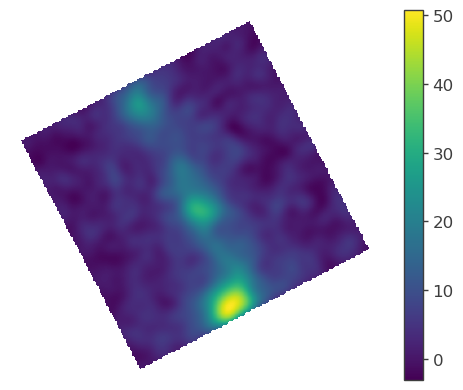

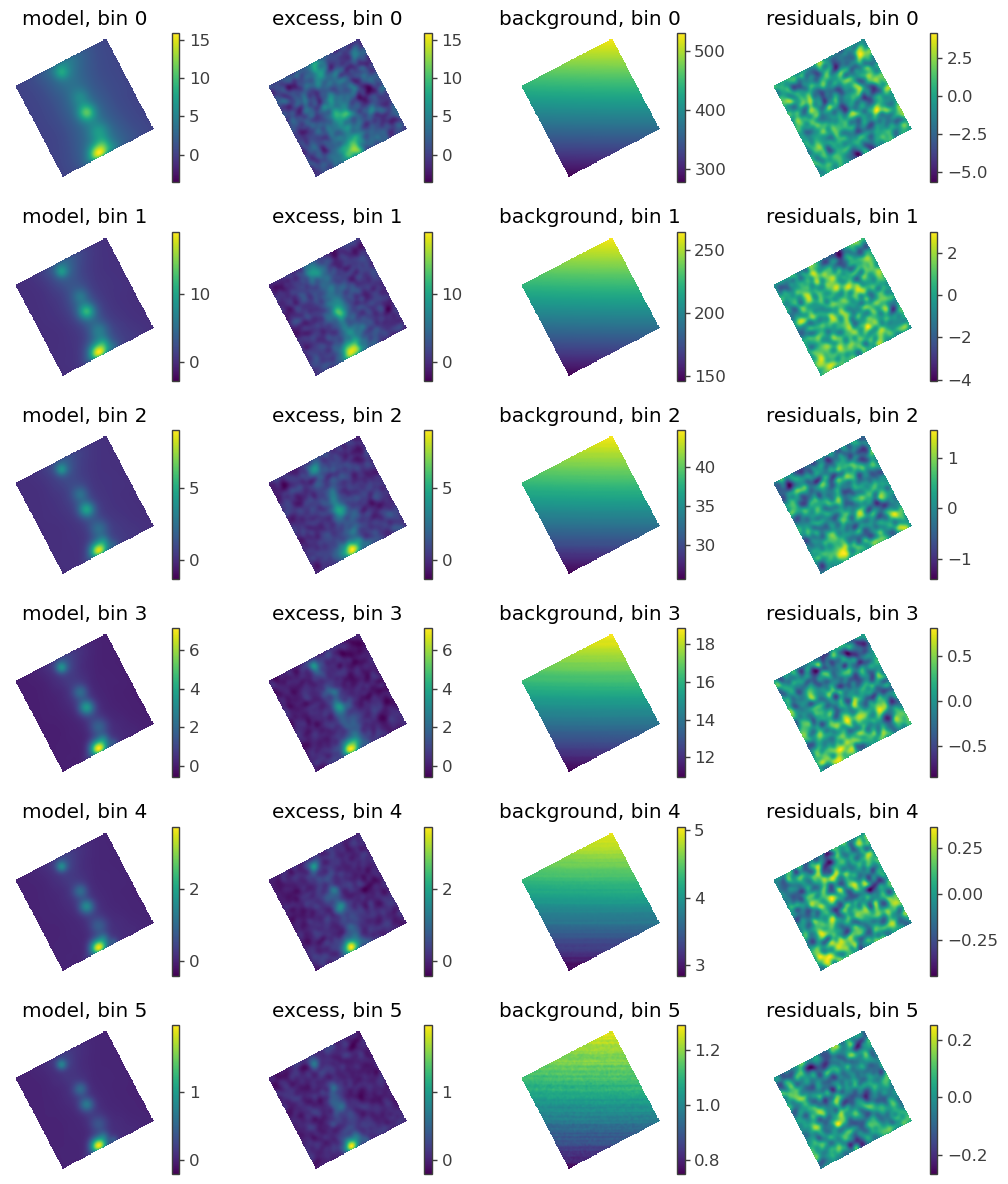

<Figure size 640x480 with 0 Axes>

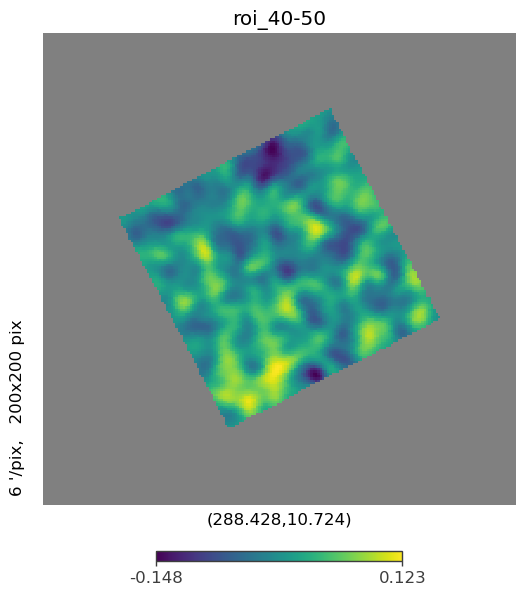

LHAASO:  1 285.58 6.8 1LHAASO J1902+0648  0.0
LHAASO:  2 286.56 7.2 1WCDA J1906+0712  0.21
LHAASO:  3 286.96 8.44 1WCDA J1907+0826  0.43
LHAASO:  4 287.05 6.26  1WCDA J1908+0615u  0.36
LHAASO:  5 287.05 6.26  1LHAASO J1908+0615u   0.43
LHAASO:  6 287.55 5.28  1LHAASO J1910+0516*  0.0
LHAASO:  7 287.88 5.07  1LHAASO J1910+0516*   0.29
LHAASO:  8 288.22 10.25 1LHAASO J1912+1014u  0.36
LHAASO:  9 288.38 10.5 1LHAASO J1912+1014u   0.5
LHAASO:  10 288.28 5.03  1LHAASO J1913+0501  0.0
LHAASO:  11 288.28 5.03  1KM2A J1913+0501  0
LHAASO:  12 288.73 11.84  1LHAASO J1914+1150u  0.21
LHAASO:  13 288.81 11.74  1LHAASO J1914+1150u   0.33
LHAASO:  14 289.78 15.93  1LHAASO J1919+1556  0.0
LHAASO:  15 289.78 15.93  1KM2A J1919+1556  0
LHAASO:  16 290.7 14.06 1LHAASO J1922+1403  0.18
LHAASO:  17 290.73 14.11 1LHAASO J1922+1403   0.0
LHAASO:  18 291.09 16.15 1LHAASO J1924+1609  1.45
LHAASO:  19 290.53 15.71 1LHAASO J1924+1609   1.22
LHAASO:  20 292.79 16.9  1LHAASO J1931+1653  0.0
LHAASO:  21 292.79 16

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.48 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1476.470644
total        1476.470644

Values of statistical measures:

statistical measures
AIC           2954.941310
BIC           2965.057053

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (3.10 +/- 0.17) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1559.564196
total        1559.564196

Values of statistical measures:

statistical measures
AIC           3121.128413
BIC           3131.244156

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.82 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1502.267524
total        1502.267524

Values of statistical measures:

statistical measures
AIC           3006.535070
BIC           3016.650813

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.57 +/- 0.18) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1453.043766
total        1453.043766

Values of statistical measures:

statistical measures
AIC           2908.087554
BIC           2918.203297

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.46 +/- 0.22) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1431.462596
total        1431.462596

Values of statistical measures:

statistical measures
AIC           2864.925214
BIC           2875.040957

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.76 +/- 0.25) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1294.846089
total        1294.846089

Values of statistical measures:

statistical measures
AIC           2591.692199
BIC           2601.807942

100%|██████████| 6/6 [01:43<00:00, 17.32s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



18:39:34 INFO      Region of Interest:                                                                   ]8;id=79518;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=972288;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=39281;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=351999;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (293.333, 19.535), model radius:      ]8;id=129227;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=771898;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.500 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=260211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=928392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=606949;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=914468;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=784464;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=938240;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 280 x 280 px                                                           ]8;id=149053;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=829616;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.05 deg                                                                 ]8;id=424875;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=241296;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=534414;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=554918;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=358650;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=305937;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=701783;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=29504;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=376196;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=936179;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=868951;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=687362;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=594853;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=159515;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=616502;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=830041;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=70709;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=325978;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=635440;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=298410;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  1.705513e+07  1.700429e+07  1.002990          30468  \
1   1   1024   RING  8.489190e+06  8.426235e+06  1.007471          30468   
2   2   1024   RING  1.434030e+06  1.415547e+06  1.013057          30468   
3   3   1024   RING  6.091237e+05  5.965805e+05  1.021025          30468   
4   4   1024   RING  1.638264e+05  1.583030e+05  1.034891          30468   
5   5   1024   RING  4.187371e+04  3.997588e+04  1.047474          30468   

   Area (deg^2)  
0     99.889058  
1     99.889058  
2     99.889058  
3     99.889058  
4     99.889058  
5     99.889058

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=495350;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=562371;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=582989;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=280674;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=551112;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=608854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=482486;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=78970;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=378170;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=52499;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=63603;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=71880;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

18:39:35 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=837580;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=927329;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

18:39:36 INFO      J1922P1403 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=254157;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=135080;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=516422;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=573986;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.37e-13 kb=(1.00e-15, 2.87e-13) index=-2.62 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=610203;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=268205;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.18 sb=(0.02,0.34) fitrange=0.56                                                         

         INFO      J1924P1609 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=487496;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=293029;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=330799;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=355354;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.44e-13 kb=(1.00e-15, 1.06e-12) index=-2.54 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=47578;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=293936;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=1.45 sb=(0.57,2.33) fitrange=3.44                                                         

18:39:37 INFO      J1928P1746u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=414263;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=89402;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=517280;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=977946;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.90e-14 kb=(4.00e-15, 1.54e-13) index=-2.22 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=685439;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=510155;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.17 sb=(0.01,0.33) fitrange=0.56                                                         

         INFO      J1929P1846u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=406319;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=43329;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=754976;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=897846;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.48e-13 kb=(8.30e-14, 4.13e-13) index=-2.37 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=905544;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=302562;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.49 sb=(0.33,0.65) fitrange=0.80                                                         

         INFO      J1937P2128 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=256725;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=490773;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=603798;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=773630;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.08e-13 kb=(1.00e-15, 1.09e-12) index=-2.43 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=274498;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=869741;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=1.25 sb=(0.00,3.09) fitrange=6.48                                                         

         INFO      J1945P2424 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=409992;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=479100;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=553410;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=845034;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.27e-13 kb=(1.00e-15, 1.19e-12) index=-2.56 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=235046;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=35724;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=1.29 sb=(0.41,2.17) fitrange=2.96                                                         

         INFO      Set diffuse range: [46, 62] [-8, 8]                                                ]8;id=197412;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=153256;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=851538;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=96440;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (296.04319324510413, 7.805741642317792)                                            ]8;id=32742;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=595978;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (304.4912371648376, 21.3910013203489)                                              ]8;id=886876;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=446233;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (289.15715314993014, 29.44921503438924)                                            ]8;id=810864;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=29106;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (281.5669824344631, 15.232481778869648)                                            ]8;id=895514;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=583131;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=489773;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=789016;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 7.7916172035158e-06                                                   ]8;id=440100;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=211377;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.061487992472267286                                                                      

         INFO      set K to: 1e-12                                                                    ]8;id=616004;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=78109;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case9_dust_bkg_template.fits            ]8;id=802945;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=627675;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  7
Particle sources  0

Free parameters (10):
--------------------

                                         value min_value max_value   
J1924P1609.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1924P1609.spectrum.main.Powerlaw.index  -2.54      -4.0      -1.0   
J1928P1746u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1928P1746u.spectrum.main.Powerlaw.index -2.22      -4.0      -1.0   
J1929P1846u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1929P1846u.spectrum.main.Powerlaw.index -2.37      -4.0      -1.0   
J1937P2128.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1937P2128.spectrum.main.Powerlaw.index  -2.43      -4.0      -1.0   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1924P1609.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1924P1609.spectrum.main.Powerlaw.index                   
J1928P1746u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1928P1746u.spectrum.main.Powerlaw.index                  
J1929P1846u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1929P1846u.spectrum.main.Powerlaw.index                  
J1937P2128.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1937P2128.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (32):
---------------------

                                                                                     value   
J1922P1403.Gaussian_on_sphere.lon0                                                   290.7  \
J1922P1403.Gaussian_on_sphere.lat0                                                   14.06   
J1922P1403.Gaussian_on_sphere.sigma                                                   0.18   
J1922P1403.spectrum.main.Powerlaw.K                                                    0.0   
J1922P1403.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1922P1403.spectrum.main.Powerlaw.index                                              -2.62   
J1924P1609.Gaussian_on_sphere.lon0                                                  291.09   
J1924P1609.Gaussian_on_sphere.lat0                                                   16.15   
J1924P1609.Gaussian_on_sphere.sigma                                                   1.45   
J1924P1609.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1928P1746u.Gaussian_on_sphere.lon0                                                 292.14   
J1928P1746u.Gaussian_on_sphere.lat0                                                  17.78   
J1928P1746u.Gaussian_on_sphere.sigma                                                  0.17   
J1928P1746u.spectrum.main.Powerlaw.piv                                        3000000000.0   
J1929P1846u.Gaussian_on_sphere.lon0                                                 292.34   
J1929P1846u.Gaussian_on_sphere.lat0                                                  18.77   
J1929P1846u.Gaussian_on_sphere.sigma                                                  0.49   
J1929P1846u.spectrum.main.Powerlaw.piv                                        3000000000.0   
J1937P2128.Gaussian_on_sphere.lon0                                                   294.3   
J1937P2128.Gaussian_on_sphere.lat0                                                    21.0   
J1937P2128.Gaussian_on_sphere.sigma                                                   1.25   
J1937P2128.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1945P2424.Gaussian_on_sphere.lon0                                                  296.36   
J1945P2424.Gaussian_on_sphere.lat0                                                    24.4   
J1945P2424.Gaussian_on_sphe

18:39:40 INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=409059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=476521;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=158754;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=583969;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 12 dec bins for extended source J1924P1609           ]8;id=539002;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=680131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=139604;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=289367;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=607944;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=62843;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.780                      ]8;id=429177;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=739115;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1929P1846u           ]8;id=429471;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=134404;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.770                      ]8;id=510302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=463867;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 14 dec bins for extended source J1937P2128           ]8;id=89772;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=765866;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 21.000                      ]8;id=853983;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=104538;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 9 dec bins for extended source J1945P2424            ]8;id=739120;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=648905;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 24.400                      ]8;id=962983;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=987924;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=918902;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=914116;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.762                      ]8;id=334723;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=621546;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=168706;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=708184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=666931;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=36436;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                               
J1924P1609.spectrum.main.Powerlaw.K            (4.3 +/- 0.5) x 10^-22  \
J1924P1609.spectrum.main.Powerlaw.index                -2.53 +/- 0.08   
J1928P1746u.spectrum.main.Powerlaw.K         (8.5 -0.9 +1.0) x 10^-23   
J1928P1746u.spectrum.main.Powerlaw.index               -2.33 +/- 0.08   
J1929P1846u.spectrum.main.Powerlaw.K      (2.42 -0.14 +0.15) x 10^-22   
J1929P1846u.spectrum.main.Powerlaw.index               -2.40 +/- 0.05   
J1937P2128.spectrum.main.Powerlaw.K        (1.68 -0.32 +0.4) x 10^-22   
J1937P2128.spectrum.main.Powerlaw.index                -2.43 +/- 0.15   
Diffuse.spectrum.main.Powerlaw.K          (1.17 -0.14 +0.16) x 10^-21   
Diffuse.spectrum.main.Powerlaw.index                   -2.59 +/- 0.08   

                                                     unit  
parameter                                                  
J1924P1609.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1924P1609.spectrum.main.Powerlaw.index                    
J1928P1746u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1928P1746u.spectrum.main.Powerlaw.index                   
J1929P1846u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1929P1846u.spectrum.main.Powerlaw.index                   
J1937P2128.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1937P2128.spectrum.main.Powerlaw.index                    
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.28 -0.02  0.05  0.18 -0.05  0.63 -0.18 -0.80  0.10
-0.28  1.00  0.08 -0.09 -0.04  0.05 -0.14  0.33  0.12 -0.58
-0.02  0.08  1.00 -0.80 -0.26  0.21  0.11 -0.04 -0.12  0.02
 0.05 -0.09 -0.80  1.00  0.21 -0.22 -0.05  0.05  0.05 -0.06
 0.18 -0.04 -0.26  0.21  1.00 -0.67  0.17 -0.06 -0.31  0.12
-0.05  0.05  0.21 -0.22 -0.67  1.00 -0.05  0.07  0.11 -0.23
 0.63 -0.14  0.11 -0.05  0.17 -0.05  1.00 -0.46 -0.79  0.16
-0.18  0.33 -0.04  0.05 -0.06  0.07 -0.46  1.00  0.22 -0.56
-0.80  0.12 -0.12  0.05 -0.31  0.11 -0.79  0.22  1.00 -0.09
 0.10 -0.58  0.02 -0.06  0.12 -0.23  0.16 -0.56 -0.09  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8640.802632
total       8640.802632

Values of statistical measures:

statistical measures
AIC          17301.606467
BIC          17402.767180

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

18:45:12 INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=902335;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=803234;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=844876;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=295216;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 12 dec bins for extended source J1924P1609           ]8;id=553575;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=318908;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=624541;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=173166;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=394568;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=106412;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.780                      ]8;id=357025;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=71684;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1929P1846u           ]8;id=987839;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=300517;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.770                      ]8;id=232223;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=129877;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 14 dec bins for extended source J1937P2128           ]8;id=563270;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=588102;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 21.000                      ]8;id=300243;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=519397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 9 dec bins for extended source J1945P2424            ]8;id=458960;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=538799;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 24.400                      ]8;id=237961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=175712;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=529550;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=98598;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.762                      ]8;id=821048;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=72451;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(297.24609375, 18.799995749310753)


<Figure size 640x480 with 0 Axes>

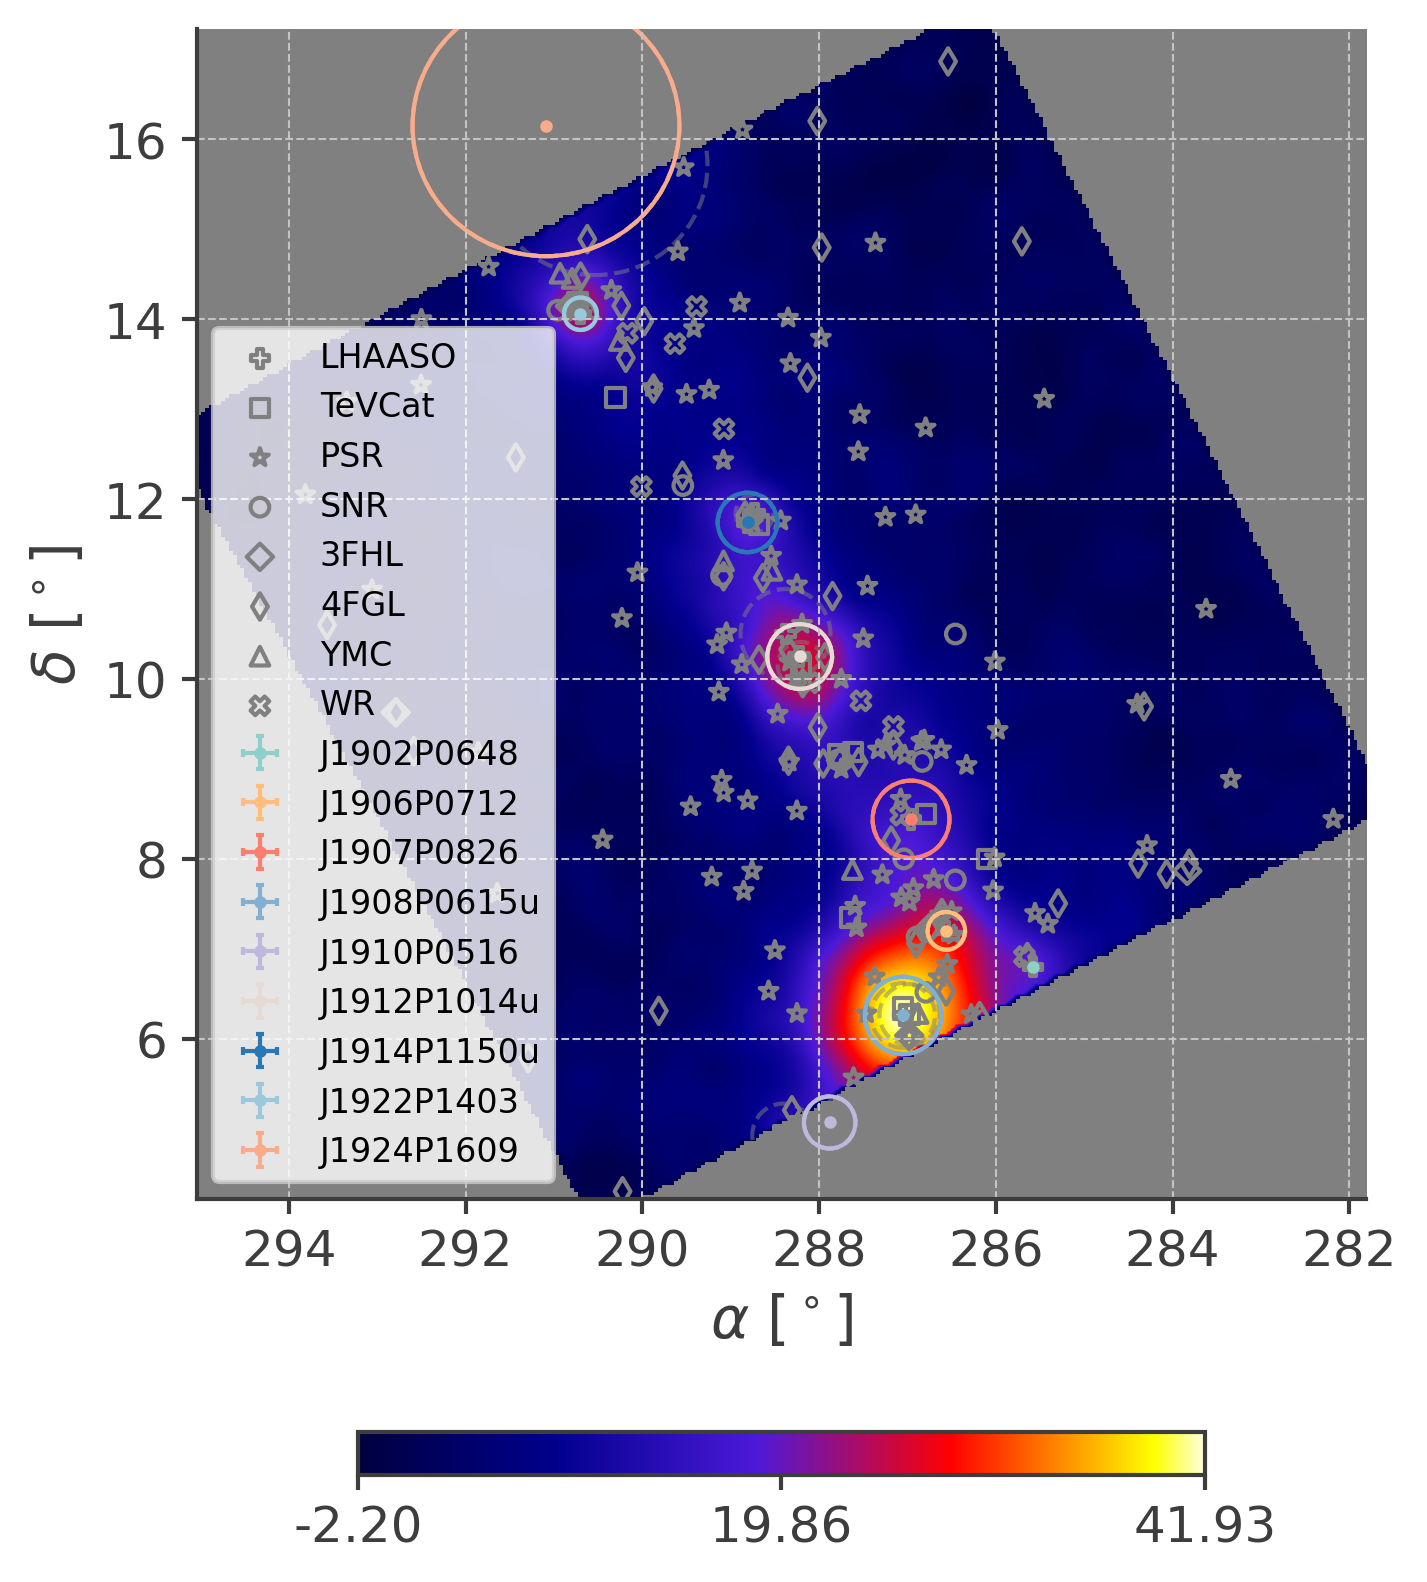

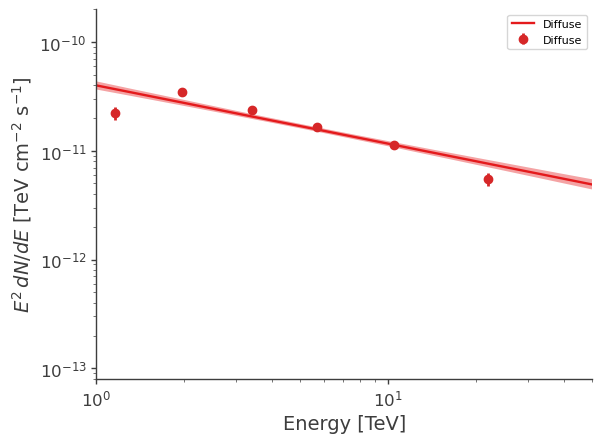

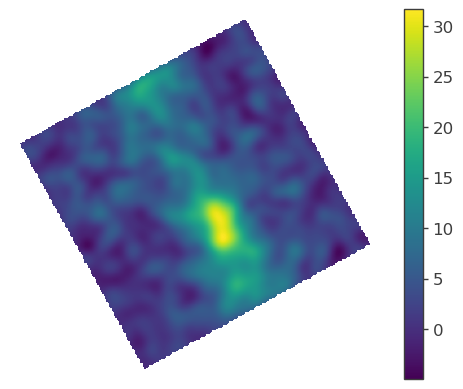

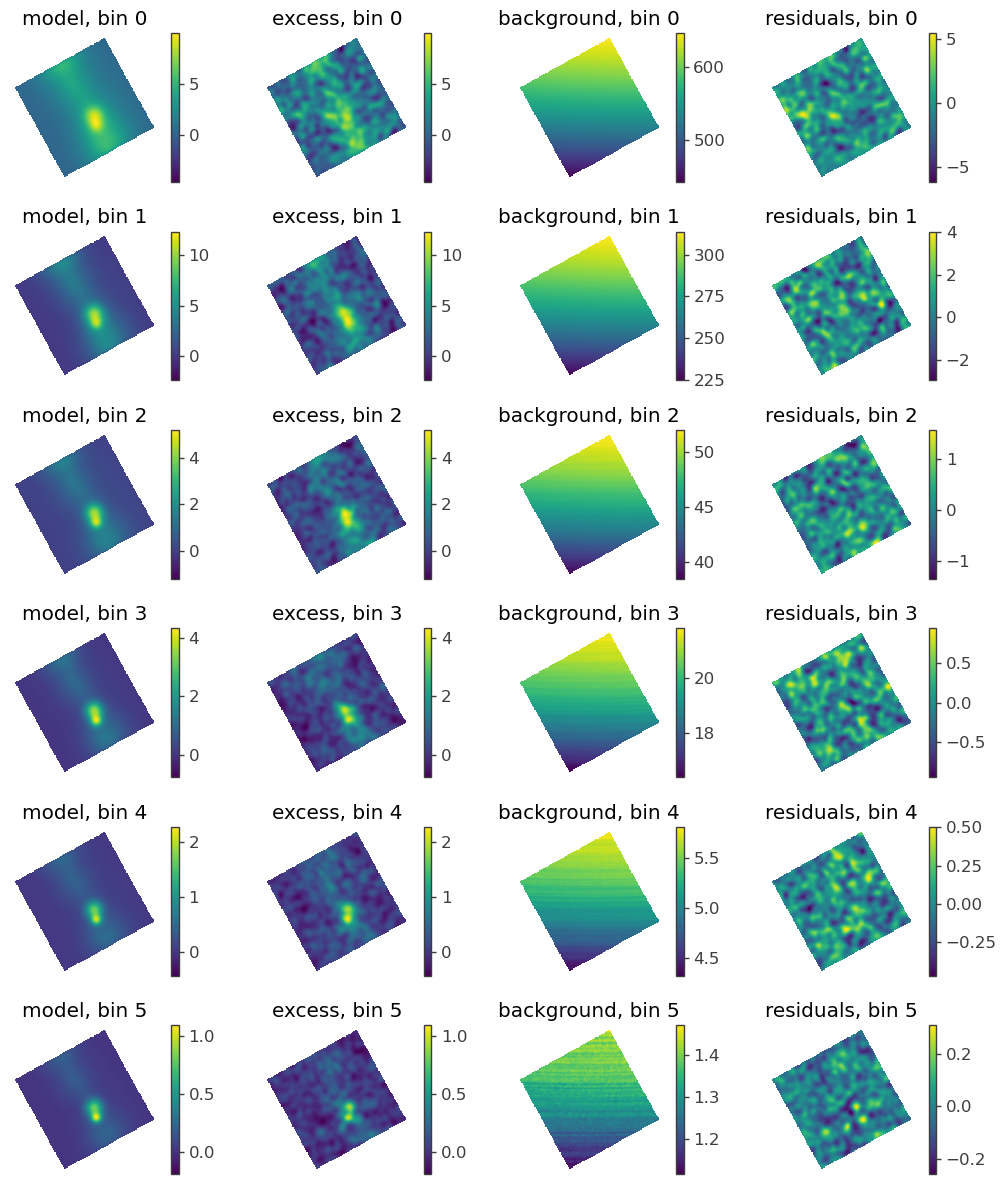

<Figure size 640x480 with 0 Axes>

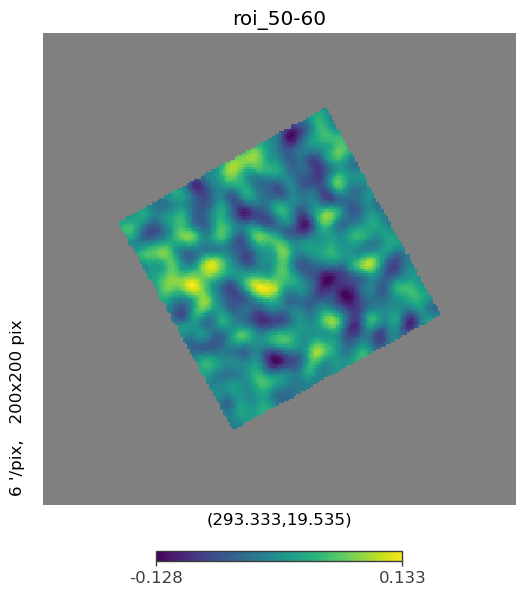

LHAASO:  1 289.78 15.93  1LHAASO J1919+1556  0.0
LHAASO:  2 289.78 15.93  1KM2A J1919+1556  0
LHAASO:  3 290.7 14.06 1LHAASO J1922+1403  0.18
LHAASO:  4 290.73 14.11 1LHAASO J1922+1403   0.0
LHAASO:  5 291.09 16.15 1LHAASO J1924+1609  1.45
LHAASO:  6 290.53 15.71 1LHAASO J1924+1609   1.22
LHAASO:  7 292.07 18.23  1LHAASO J1928+1813u  0.63
LHAASO:  8 292.07 18.23  1KM2A J1928+1813u  0
LHAASO:  9 292.14 17.78 1LHAASO J1928+1746u  0.17
LHAASO:  10 292.17 17.89 1LHAASO J1928+1746u   0.0
LHAASO:  11 292.34 18.77 1LHAASO J1929+1846u*  0.49
LHAASO:  12 292.04 18.97 1LHAASO J1929+1846u*   0.0
LHAASO:  13 292.79 16.9  1LHAASO J1931+1653  0.0
LHAASO:  14 292.79 16.9  1KM2A J1931+1653  0
LHAASO:  15 294.32 21.48  1LHAASO J1937+2128  1.43
LHAASO:  16 294.3 21.0  1LHAASO J1937+2128   1.25
LHAASO:  17 296.36 24.4 1LHAASO J1945+2424*  1.29
LHAASO:  18 297.42 23.97 1LHAASO J1945+2424*   0.36
TeVCat:  1 288.26249999999993 19.802500000000002 GRB 221009A 0.0
TeVCat:  2 288.76333333333326 16.4102777777777

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (6.2 +/- 1.4) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1454.284916
total        1454.284916

Values of statistical measures:

statistical measures
AIC           2910.569854
BIC           2920.686024

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.55 +/- 0.13) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1595.889823
total        1595.889823

Values of statistical measures:

statistical measures
AIC           3193.779668
BIC           3203.895837

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.41 +/- 0.16) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1427.313448
total        1427.313448

Values of statistical measures:

statistical measures
AIC           2856.626918
BIC           2866.743088

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.14 +/- 0.14) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1469.167179
total        1469.167179

Values of statistical measures:

statistical measures
AIC           2940.334379
BIC           2950.450549

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.27 +/- 0.19) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1        1395.17748
total         1395.17748

Values of statistical measures:

statistical measures
AIC           2792.354982
BIC           2802.471151

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (6.7 +/- 2.3) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA_1       1283.726909
total        1283.726909

Values of statistical measures:

statistical measures
AIC           2569.453839
BIC           2579.570009


100%|██████████| 6/6 [01:48<00:00, 18.15s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



<Figure size 640x480 with 0 Axes>

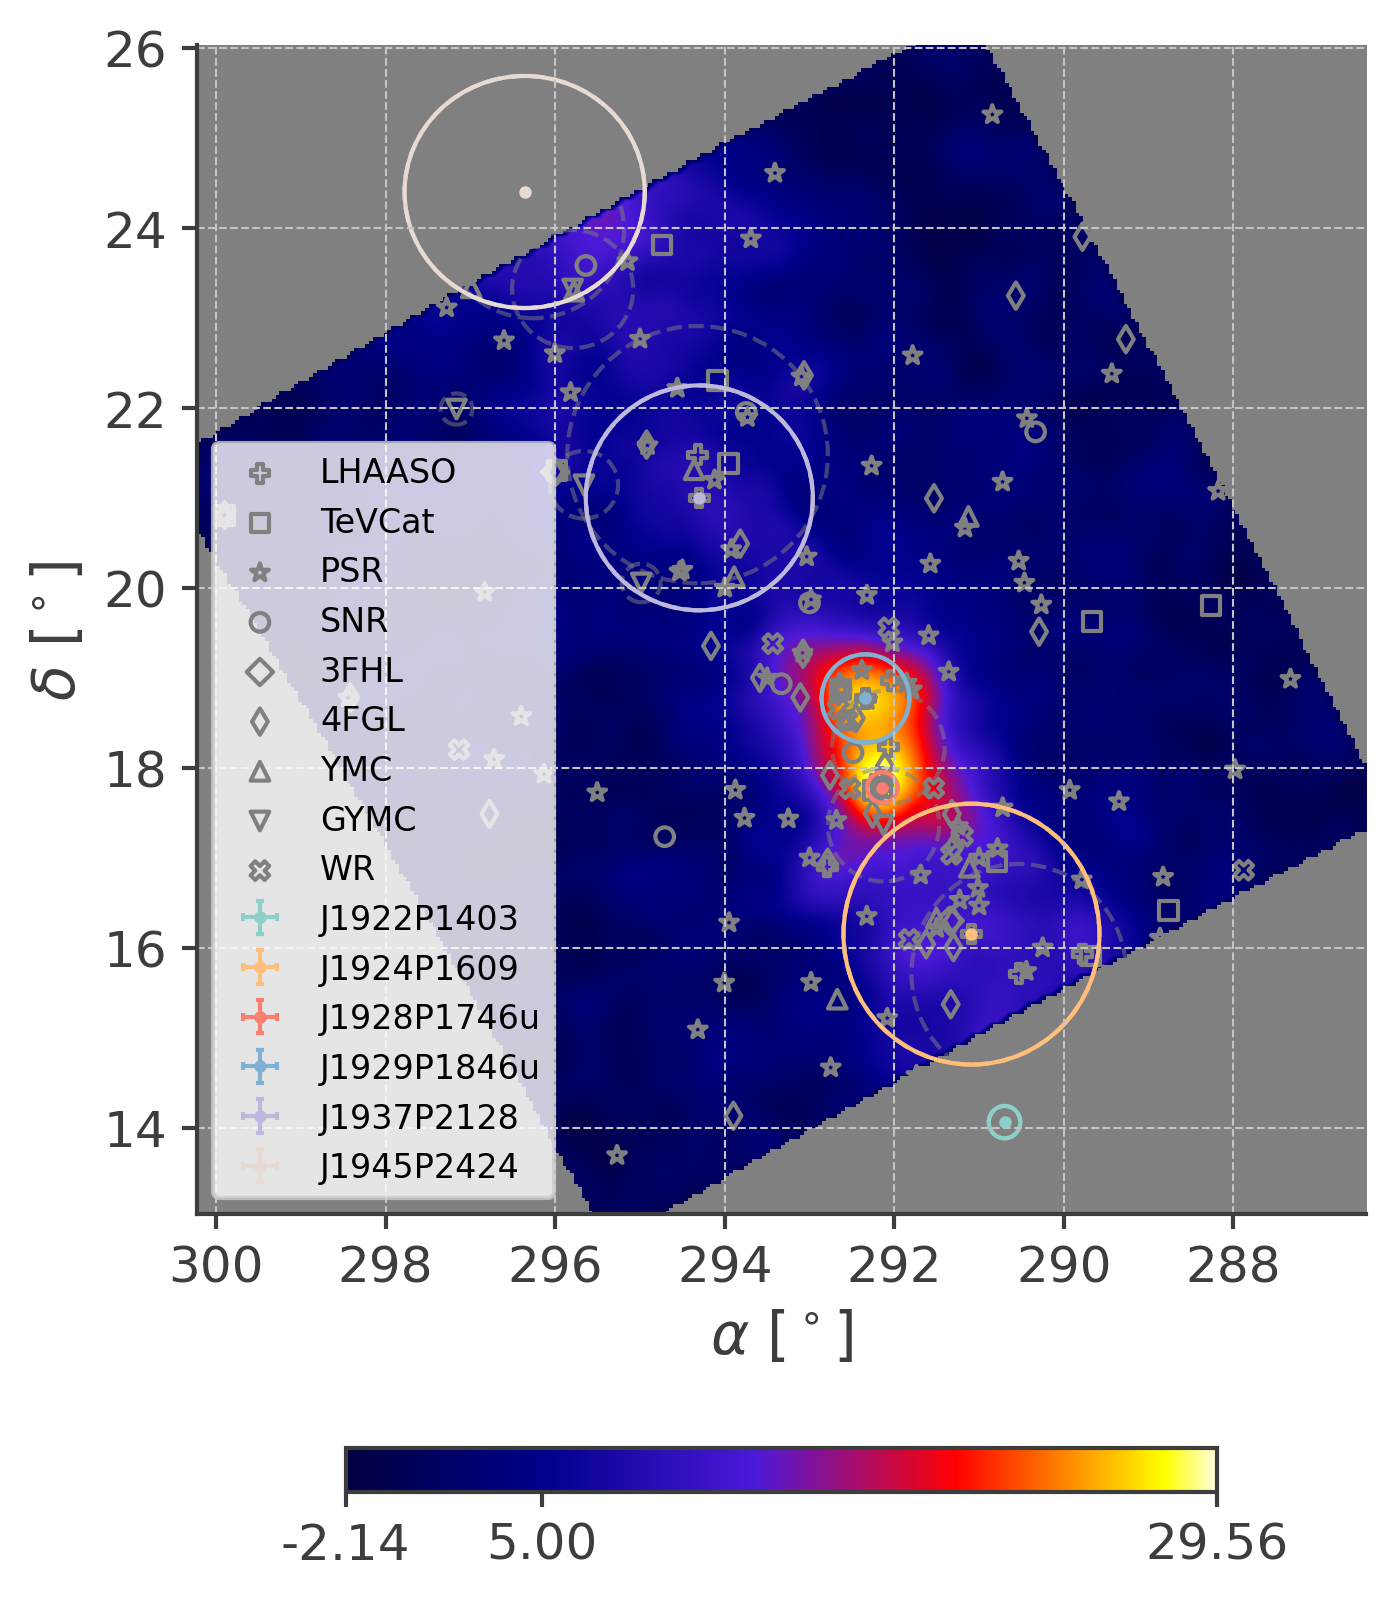

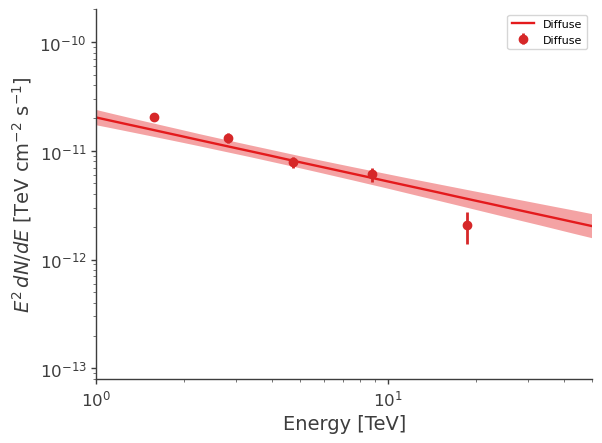

In [36]:
%matplotlib inline
#####   Data Initialize
# activate_warnings()

# maptree = "../../data/gcd_new.root"
# response="../../data/WCDA_DR_psf.root"

# maptree =  "../../data/hsc2healpix_20210305_20220930.root"
# response = "../../data/WCDA_DR2.root"

# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"
# response = "../../data/DR_ihep_MK2.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

maptree =  "../../data/20210305-20230731_trans_fromhsc.root"
response = "../../data/DR_ihep_MK2_newoldDRpsf.root"


region_name="Diffuse_WCDA_case9"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')


nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix
pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(range(15,65,10)): # #!!!!!!!!!!!!!!!!!!!365
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    # hp.mollview(signal,title="ROI",norm='hist')
    # hp.graticule()
    ra1,dec1=RA_center, Dec_center

    data_radius = 6.5
    model_radius = 7

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.05)

    #####   Data Situation
    %matplotlib inline
    WCDA.set_active_measurements(0, 5)
    WCDA.display()
    WCDA.psf_integration_method="fast"

    my.settransWCDA(WCDA, ra1, dec1)

    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=8, rtflux=15, rtindex=10, rtp=8,  detector="WCDA", roi=roi, pf=True, sf=True, kf=False, indexf=False,  mkf=True, mindexf=True, indexb=(-4,-1))

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, name=region_name, ifreturnratio=True, Kb=(1e-18, 1e-10), indexb=(-4.5, -0.5), index=-2.5, K=1e-12
                ) #Kn=1
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="ROOT") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(WCDA, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_llh-2.6.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, iffixtans=1)
    import matplotlib as mpl

    x_Max=50.
    x_Min=1
    y_Min=0.8e-13
    y_Max=2e-10
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:
    #     continue

roi_10-20


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_20-30


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_30-40


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_40-50


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_50-60


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



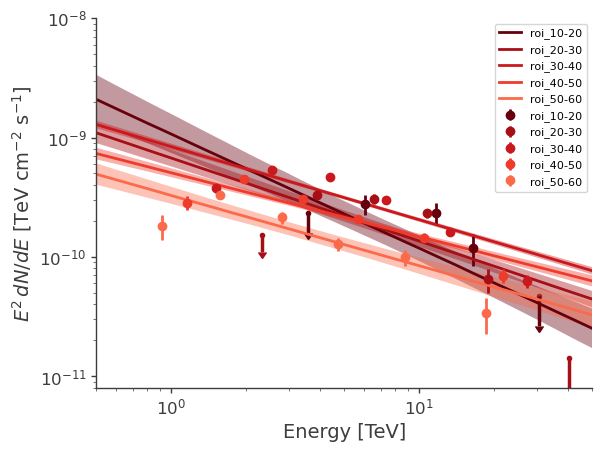

In [37]:
%matplotlib inline
import glob
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
ss = []
ssr= []
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[:7]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    resultdict = resultsss.get_data_frame()
    gc.append(range(15,365,10)[i])
    dk.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    try:
        dkf.append(resultsall[i][2][0])
    except:
        resultfile = np.load(f"../res/{region_name}/resultsall.npy")
        dkf = resultfile[9]
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
        )
    my.Draw_spectrum_fromfile(subfolder+"Spectrum_Diffuse.txt", label=name, color=my.red_palette[-(i+1)], subplot=ax, scale=1/dkf[i])
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
results=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
np.save(f"../res/{region_name}/resultsall.npy",results)
from threeML.analysis_results import AnalysisResultsSet
resultsall
rrr = [it[0][0].results for it in resultsall]
analysis_set = AnalysisResultsSet(rrr)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band10-70.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band10-70.pdf",dpi=300)

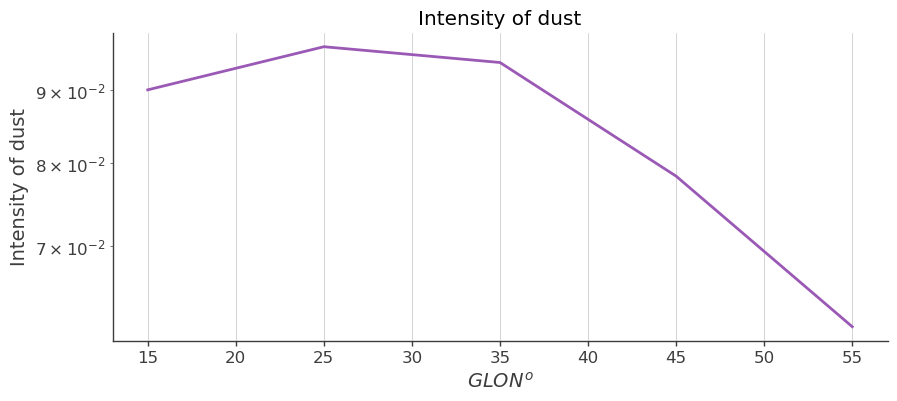

In [38]:
plt.figure(figsize=(10,4)) #
plt.plot(gc, np.array(dkf)) #np.array(den)*1e9, np.array(dep)*1e9 , fmt="o"
plt.yscale("log")
plt.title("Intensity of dust")

plt.ylabel(r"Intensity of dust")
# plt.ylim(1e-7, 1e-4)
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/dust.png",dpi=300)
plt.savefig(f"../res/{region_name}/dust.pdf",dpi=300)

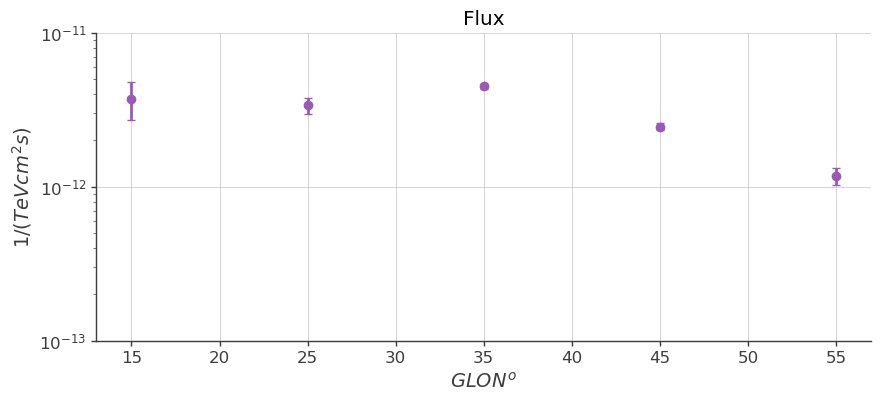

In [39]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-13, 1e-11)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

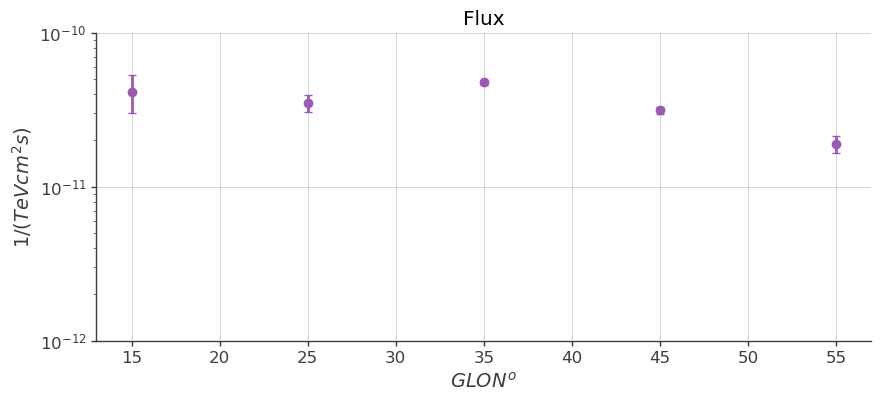

In [40]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-12, 1e-10)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux_fullsky.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux_fullsky.pdf",dpi=300)

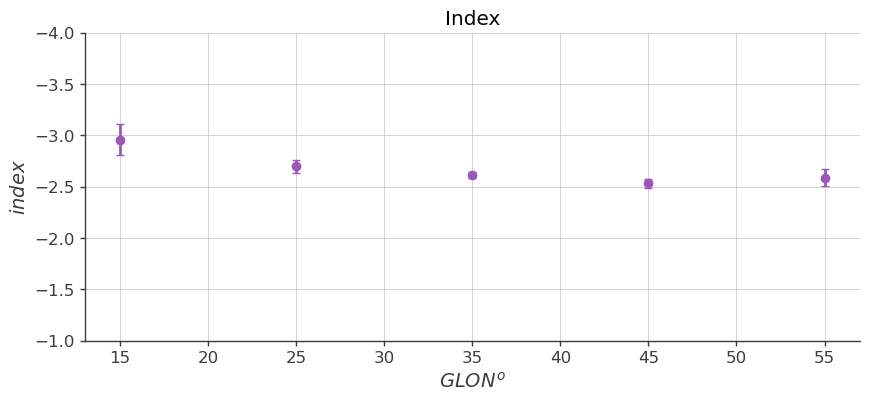

In [41]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o", capsize=3) #dien, diep
plt.ylim(-1,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()
plt.savefig(f"../res/{region_name}/index.png",dpi=300)
plt.savefig(f"../res/{region_name}/index.pdf",dpi=300)

In [ ]:
%matplotlib inline
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[6:14]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i+6]} #
        )
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
    

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band70-150.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band70-150.pdf",dpi=300)